## We will cover the following topics:
*  Representing an image

*  Why leverage neural networks for image analysis?

*  Preparing data for image classification

*  Training a neural network

*  Scaling a dataset to improve model accuracy

*  Understanding the impact of varying the batch size

*  Understanding the impact of varying the loss optimizer

*  Understanding the impact of varying the learning rate

*  Understanding the impact of learning rate annealing

*  Building a deeper neural network

*  Understanding the impact of batch normalization

*  The concept of overfitting

---

# Representing an image

 * A digital image file is made up an array of pixels, with grayscale images having single values between 0 and 255 (0 is black, 255 is white), while color images have three-dimensional vectors representing red, green, and blue channels.

 * An image has height x width x c pixels, where height is the number of rows, width is the number of columns, and c is 3 for color images and 1 for grayscale.
 
 * A pixel value of 0 is black, and 255 is pure white for grayscale or pure red/green/blue in the respective channel for a color image.

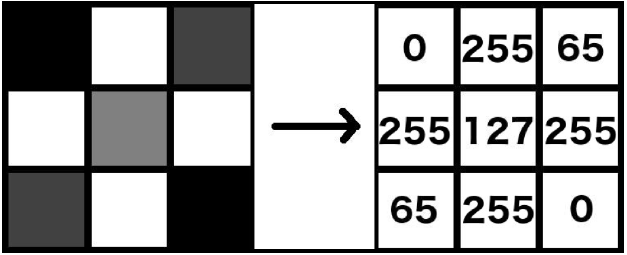

---

# Converting images into structured arrays and scalars

In [1]:
# 1. Download a sample image
# ! wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg

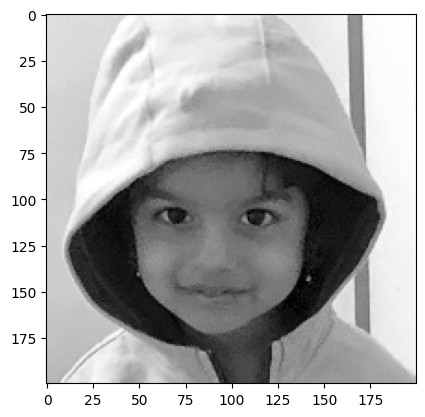

In [2]:
# 2. Import libraries and read the downloaded image into the Python environment
import cv2
import matplotlib.pyplot as plt

img =cv2.imread('Hemanvi.jpeg')  # This converts an image into an array of pixel

# 3. We'll crop the image between 50th-250th rows, as well as 40th-240th  and convert the image into grayscale
img = img[50:250, 40:240]
img_gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

# # Show image
plt.imshow(img_gray,  cmap='gray')
plt.show()

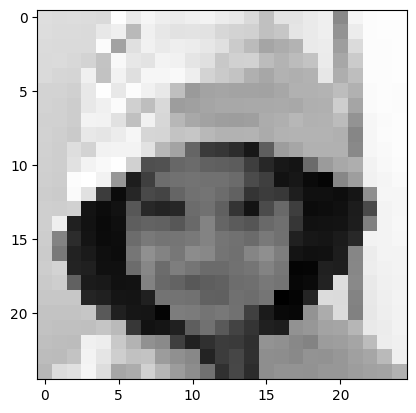

In [3]:
# 4. Convert the image into a 25 x 25 array and plot it
img_gray_small = cv2.resize(img_gray , (25,25))
plt.imshow(img_gray_small, cmap='gray')
plt.show()

* Having fewer pixels to represent the same image results in a blurrier output.

In [4]:
# 5. Let's inspect the pixel values
img_gray_small

array([[222, 220, 221, 220, 218, 253, 234, 245, 238, 235, 239, 243, 236,
        232, 218, 193, 228, 228, 234, 239, 139, 245, 252, 253, 253],
       [221, 219, 219, 218, 232, 239, 186, 240, 231, 226, 227, 226, 215,
        212, 209, 193, 199, 229, 234, 239, 150, 236, 252, 253, 253],
       [219, 218, 218, 218, 251, 163, 224, 241, 234, 238, 236, 231, 224,
        204, 188, 166, 173, 180, 234, 236, 159, 219, 252, 252, 253],
       [218, 219, 216, 211, 196, 248, 231, 228, 243, 241, 229, 224, 201,
        209, 210, 189, 181, 189, 196, 235, 168, 204, 252, 252, 253],
       [218, 214, 213, 240, 195, 242, 223, 246, 246, 249, 238, 211, 203,
        196, 177, 168, 179, 176, 179, 231, 175, 191, 252, 252, 253],
       [212, 212, 208, 232, 254, 232, 252, 241, 232, 192, 155, 164, 166,
        165, 164, 163, 168, 178, 178, 181, 190, 178, 250, 252, 251],
       [211, 209, 205, 232, 240, 251, 208, 191, 217, 158, 161, 166, 169,
        169, 170, 170, 171, 169, 176, 177, 206, 166, 250, 252, 251],
      

**Note** that in the preceding code, we have reordered the channels using the cv2.cvtcolor method. We've done this because when we import images using cv2, the channels are ordered as Blue first, Green next,and finally Red; typically, we are used to looking at images in RGB channels, where the sequence is Red, Green, and then Blue.

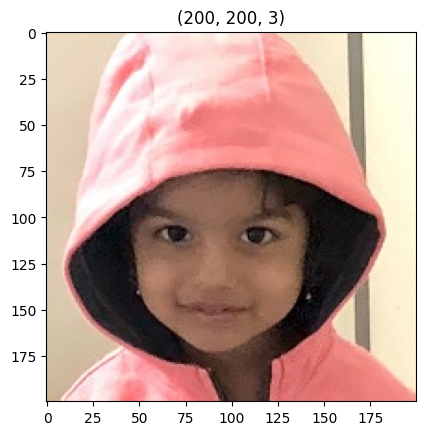

In [5]:
# working on colored img
img =cv2.imread('Hemanvi.jpeg') 
img = img[50:250,40:240,:]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Plot the image
plt.imshow(img)
plt.title(f'{img.shape}')
plt.show()

[[[242 149 141]
  [249 161 151]
  [239 161 148]]

 [[239 145 135]
  [244 150 140]
  [247 159 149]]

 [[239 145 135]
  [242 148 138]
  [245 153 142]]]


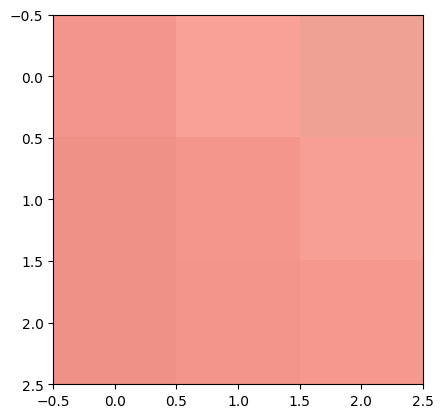

In [6]:
# The bottom-right 3 x 3 array of pixels
crop_img = img[-3:,-3:]

# print and plot crop_img
print(crop_img)
plt.imshow(crop_img)
plt.show()

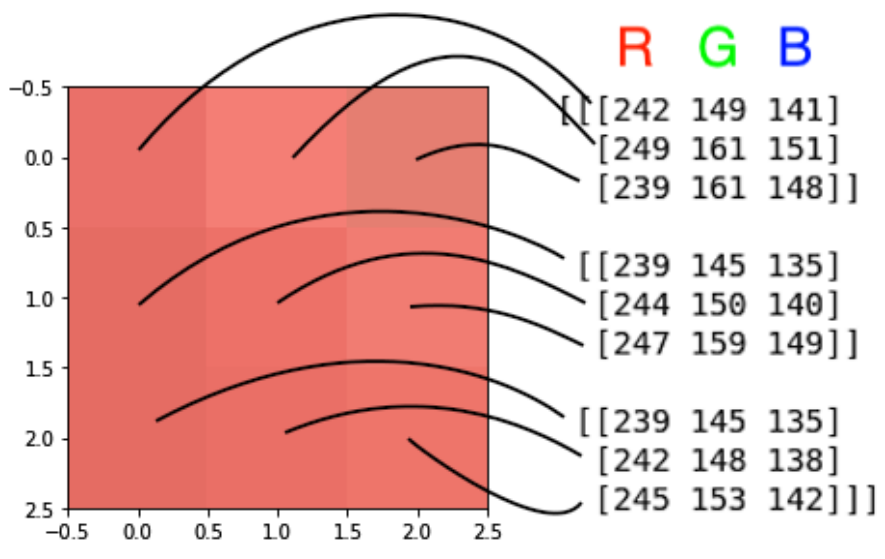

    Converting an image into a structured array of numbers allows us to perform mathematical operations on images, enabling tasks like classification, detection, and segmentation through various techniques, leveraging the numerical representation of images.


---



# Why leverage neural networks for image analysis?

#####  Traditional computer vision methods required the manual creation of specific image features before processing, a step avoided by training neural networks, which can learn and extract features automatically.

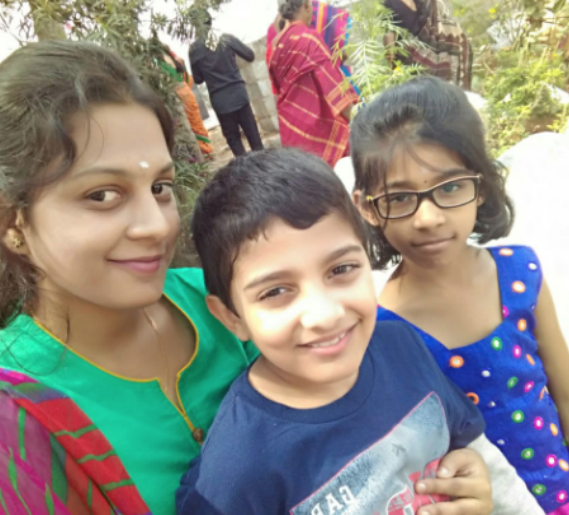

* **Histogram feature**: For some tasks, such as auto-brightness or night vision, it is important to understand the illumination in the picture; that is, the fraction of pixels that are bright or dark

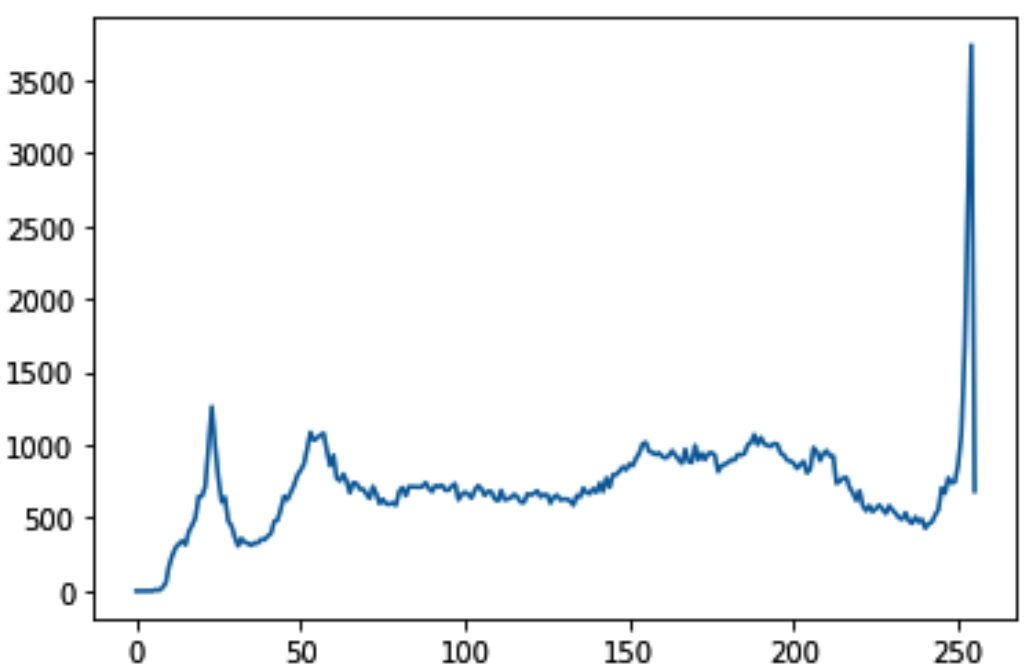


The following graph shows a histogram for the example image. It depicts that the image is well illuminated since there is a spike at 255

---

* **Edges and Corners feature**: For tasks such as image segmentation, where it is important to find the set of pixels corresponding to each person, it makes sense to extract the edges first because the border of a person is just a collection of edges. In other tasks, such as image registration, it is vital that key landmarks are detected. These landmarks will be a subset of all the corners in an image.

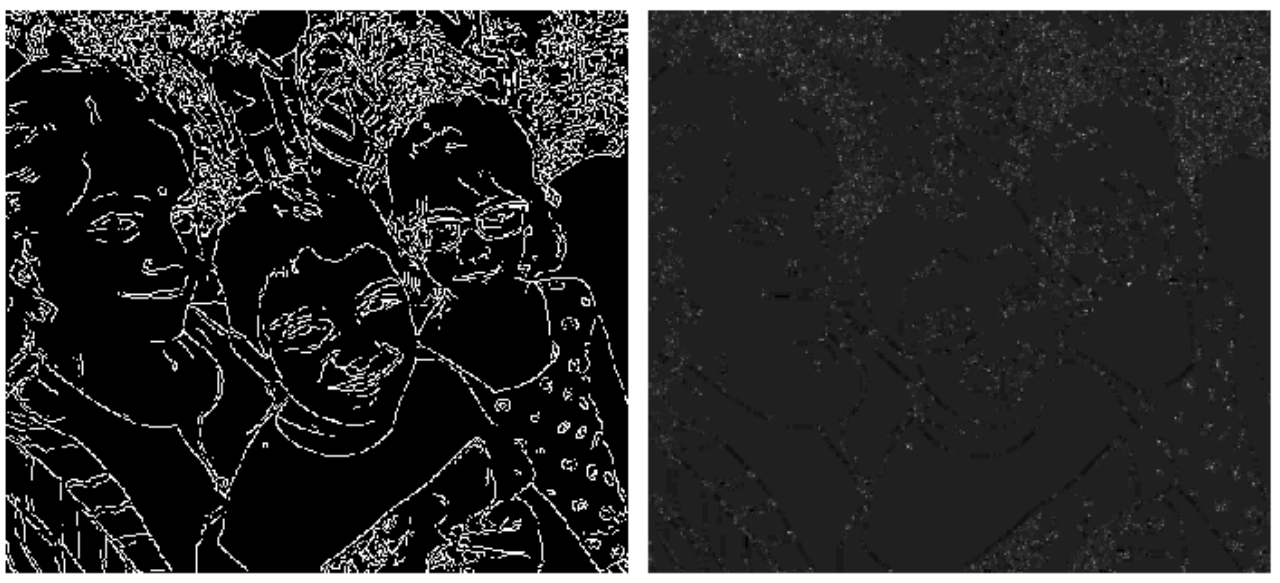

The following image represents the edges and corners that can be found in our example image

---

* **Color separation feature**: In tasks such as traffic light detection for a self-driving car, it is important that the system understands what color is being displayed on the traffic lights. 

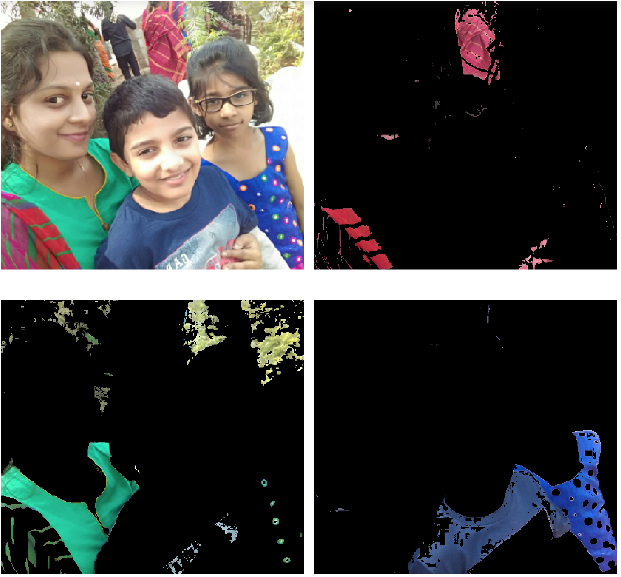

The following image (best viewed in color) shows the exclusively red, green, and blue pixels for the example image

---

* **Image gradients feature**: Taking this a step further, it might be important to understand how the colors are changing at the pixel level. Different textures can give us different gradients, which means they can be used as texture detectors. In fact, finding gradients is a prerequisite for edge detection.

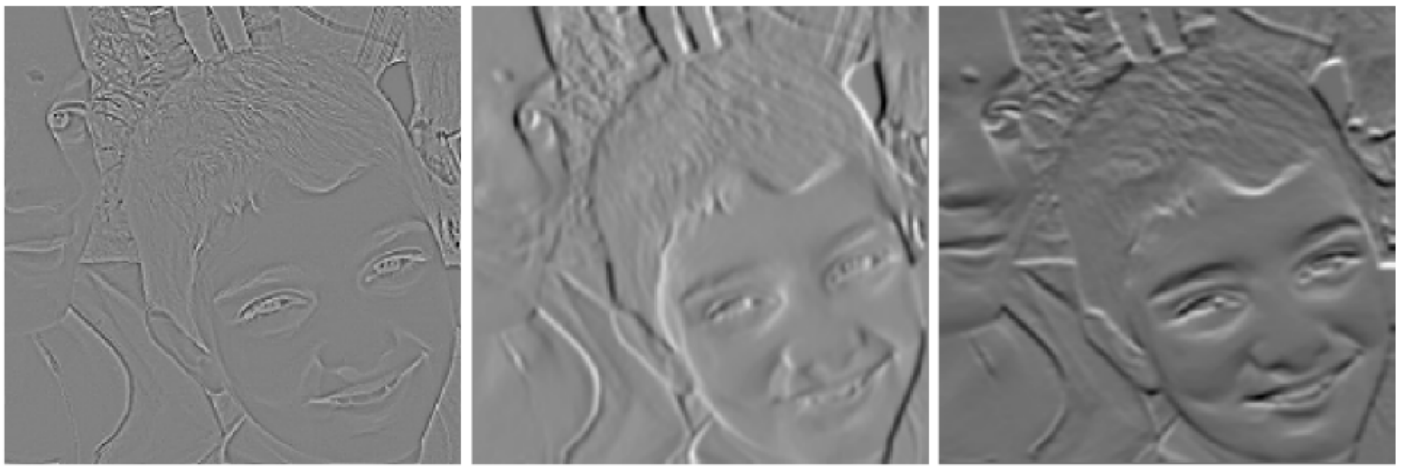

The following image shows the overall gradient, as well as the y and x components of the gradient, for a section of our example image

 ---

- Traditional feature creation for image and signal analysis requires expertise and a deep understanding of which features are suitable for solving a problem.

- Even with expertise, there's no assurance that an expert can find the ideal combination of inputs or that this combination will work in new scenarios.

- The limitations in traditional feature engineering have led the community to favor neural network-based models.

- Neural networks autonomously identify relevant features and learn to combine them optimally for tasks, serving as both feature extractors and classifiers.

---

# Preparing our data for image classification

In [7]:
# 1. Start by downloading the dataset and importing the relevant packages.
from torchvision import datasets
import torch

data_folder ='Dataset/FMNIST/'
fmnist = datasets.FashionMNIST(root=data_folder, download=True, train=True)

In [8]:
tr_images = fmnist.data
tr_targets = fmnist.targets

In [9]:
# 2. Inspect the tensors that we are dealing with
unique_values = tr_targets.unique()
print(f'tr_images & tr_targets:\n\tX -{tr_images.shape}\n\tY -{tr_targets.shape}\n\tY-Unique Values : {unique_values}')
print(f'TASK:\n\t{len(unique_values)} class Classification')
print(f'UNIQUE CLASSES:\n\t{fmnist.classes}')

tr_images & tr_targets:
	X -torch.Size([60000, 28, 28])
	Y -torch.Size([60000])
	Y-Unique Values : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TASK:
	10 class Classification
UNIQUE CLASSES:
	['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


---
The dataset comprises 60,000 images, each sized 28 x 28, distributed across 10 distinct classes, where tr_targets holds the numerical class values, and fmnist.classes provides the corresponding class names for these numeric values.

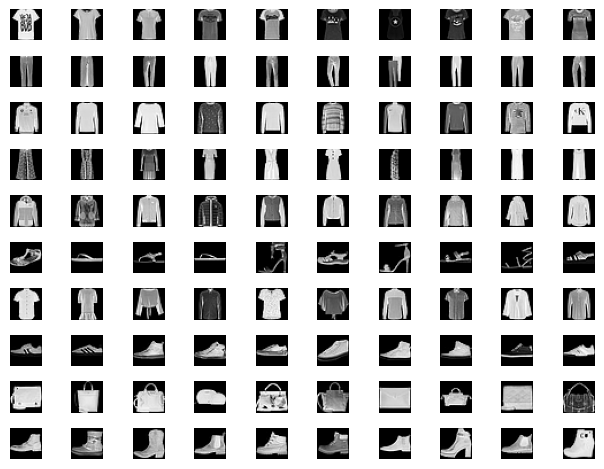

In [10]:
import numpy as np 
import matplotlib.pyplot as plt

# 3. Plot a random sample of 10 images for all the 10 possible classes
def plot_random_samples(tr_images, tr_targets):
    """Plots a random sample of 10 images for all the 10 possible classes.

    Args:
        tr_images (np.ndarray): A numpy array of the training images.
        tr_targets (np.ndarray): A numpy array of the training targets.

    Returns:
        None
    """

    fig, ax = plt.subplots(10, 10)

    for label_class, plot_row in enumerate(ax):
        # Get the indices of all the images in the training set that belong to the current class.
        label_x_rows = np.where(tr_targets == label_class)[0]

        # Iterate over the subplots in the current row.
        for plot_cell in plot_row:
            # Disable the grid and the axes for each subplot.
            plot_cell.grid(False)
            plot_cell.axis('off')

            # Randomly select one image from the training set for the current class.
            ix = np.random.choice(label_x_rows)

            # Get the image and the target value of the selected image.
            x, y = tr_images[ix], tr_targets[ix]

            # Display the image in the current subplot.
            plot_cell.imshow(x, cmap='gray')

    # Tighten the layout of the figure.
    plt.tight_layout()

    # Display the figure.
    plt.show()


# Plot the random samples.
plot_random_samples(tr_images, tr_targets)


    Note that in the preceding image, each row represents a sample of 10 different images all belonging to the same class.

---

# Training a neural network

##### To train a neural network, we must perform the following steps:

1. Import the relevant packages.

2. Build a dataset that can fetch data one data point at a time.

3. Wrap the DataLoader from the dataset.

4. Build a model and then define the loss function and the optimizer.

5. Define two functions to train and validate a batch of data, respectively.

6. Define a function that will calculate the accuracy of the data.

7. Perform weight updates based on each batch of data over increasing epochs.

In [11]:
# 1. Import the relevant packages and the FMNIST dataset
import torch 
import torch.nn as nn
from torch.optim import SGD
from torchvision import datasets 
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt

## define device 
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## folder path to download data
data_folder ='Dataset/FMNIST/'

## download FMNIST
fmnist = datasets.FashionMNIST(root= data_folder ,download=True ,train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets

In [12]:
# 2. Build a class that fetches the dataset.
class FMNISTDataset(Dataset):
    def __init__(self , x, y):
        self.x =x.float().view(-1,28*28)
        self.y = y
    def __getitem__(self, ix):
        x,y =self.x[ix],self.y[ix]
        return x.to(device),y.to(device)
    def __len__(self):
        return len(self.x)

# 3. Create a function that generates a training DataLoader
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train,batch_size=32, shuffle=True)
    return trn_dl

#4. Define a model, as well as the loss function and the optimizer
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28,1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=1e-2) 
    return model, loss_fn, optimizer

# 5. Define a function that will train the dataset on a batch of images
def train_batch(x,y,model,opt,loss_fn):
    model.train()
    prediction = model(x)
    #compute loss
    batch_loss = loss_fn(prediction,y)

    # based on the forward pass in `model(x)` compute all the
    # gradients of 'model.parameters()'
    batch_loss.backward()

    # apply new-weights = f(old-weights, old-weight-gradients)
    # where "f" is the optimizer
    opt.step()
    # Flush gradients memory for next batch of calculations
    opt.zero_grad()
    return batch_loss.item()

# 6. Build a function that calculates the accuracy of a given dataset
# since there's no need for updating weights,
# we might as well not compute the gradients.
# Using this '@' decorator on top of functions
# will disable gradient computation in the entire function

@torch.inference_mode()
def accuracy(x,y,model):
    model.eval()
    # get the prediction matrix for a tensor of `x` images
    prediction = model(x)
    # compute if the location of maximum in each row
    # coincides with ground truth
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()


In [13]:
# 7. Train the neural network

## Initialize the model, loss, optimizer, and DataLoaders
trn_dl = get_data()
model, loss_fn, optimizer = get_model()

## Invoke the lists that contain the accuracy and loss values at the end of each epoch
losses , accuracies = [],[]
for epoch in range(5):
    print(epoch)

    # Invoke the lists that will contain the accuracy and loss values corresponding to each batch within an epoch
    epoch_losses , epoch_accuracies = [],[]

    # Create batches of training data by iterating through the DataLoader
    for ix , batch in enumerate(iter(trn_dl)):
        x,y  = batch 
        
        #  store the loss values across batches in the epoch_losses list
        batch_loss = train_batch(x,y,model,optimizer,loss_fn)
        
        epoch_losses.append(batch_loss)
    # We store the mean loss value across all batches within an epoch
    epoch_loss = np.array(epoch_losses).mean()
    
    # Next, we calculate the accuracy of the prediction at the end of training on all batches    
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

0
1
2
3
4


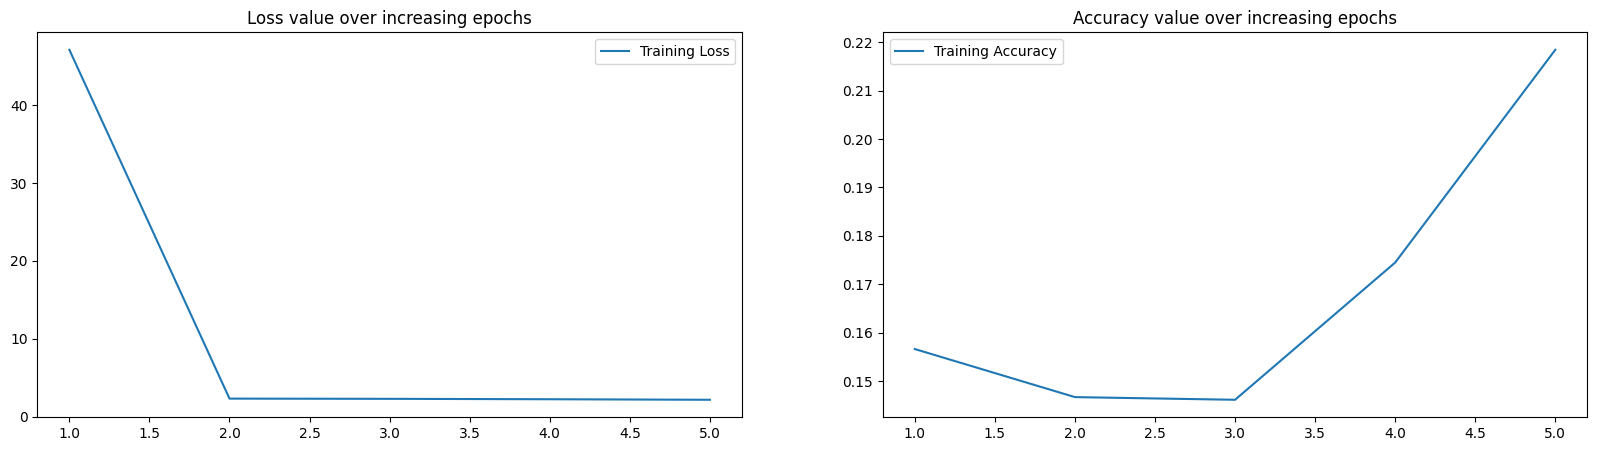

In [14]:
# The variation of the training loss and accuracy over increasing epochs can be displayed
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.legend()
plt.show()

Our training accuracy is at 12% at the end of the five epochs. Note that the loss value did not decrease considerably over an increasing number of epochs. In other words, no matter how long we wait, it is unlikely that the model is going to provide high accuracy (say, above 80%). This calls for us to understand how the various hyperparameters that were used impact the accuracy of our neural network.

---

# Scaling a dataset to improve model accuracy

    Scaling a dataset is the process of ensuring that the variables are confined to a finite range.

we will confine the independent variables' values to values between 0 and 1 by dividing each input value by the maximum possible value in the dataset. This is a value of 255, which corresponds to white pixels

In [15]:
# 1. Fetch the dataset, as well as the training images and targets
import torch 
import torch.nn as nn
from torch.optim import SGD
from torchvision import datasets 
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt

## define device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## folder path to download data
data_folder ='Dataset/FMNIST/'

## download FMNIST
fmnist = datasets.FashionMNIST(root=data_folder, download=True,train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets

In [16]:
# 2. Modify FMNISTDataset, which fetches data, so that the input image is divided by 255 
class FMNISTDataset(Dataset):
    def __init__(self, x,y):
        self.x = (x.float()/255).view(-1,28*28)
        self.y = y
    def __getitem__(self, ix):
        x,y = self.x[ix],self.y[ix]
        return x.to(device),y.to(device)
    def __len__(self):
        return len(self.x)
    
# 3. Train a model
## Fetch the data
def get_data():
    train = FMNISTDataset(tr_images,tr_targets)
    trn_dl = DataLoader(train , batch_size=32 , shuffle=True)
    return trn_dl

## Define the model
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28,1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    optimizer = SGD(model.parameters(),lr=1e-2)
    loss_fn = nn.CrossEntropyLoss()
    return model,loss_fn,optimizer

## Define the functions for training and validating a batch of data
def train_batch(x, y, model ,opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction,y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()

@torch.inference_mode()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

## Train the model over increasing epochs
trn_dl = get_data()
model, loss_fn, optimizer = get_model()
losses, accuracies = [], []

for epoch in range(5):
    print(epoch)
    epoch_losses, epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer,loss_fn)
        epoch_losses.append(batch_loss)
    epoch_loss = np.array(epoch_losses).mean()
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        epoch_accuracies.extend(is_correct)
    epoch_accuracy = np.mean(epoch_accuracies)
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

0
1
2
3
4


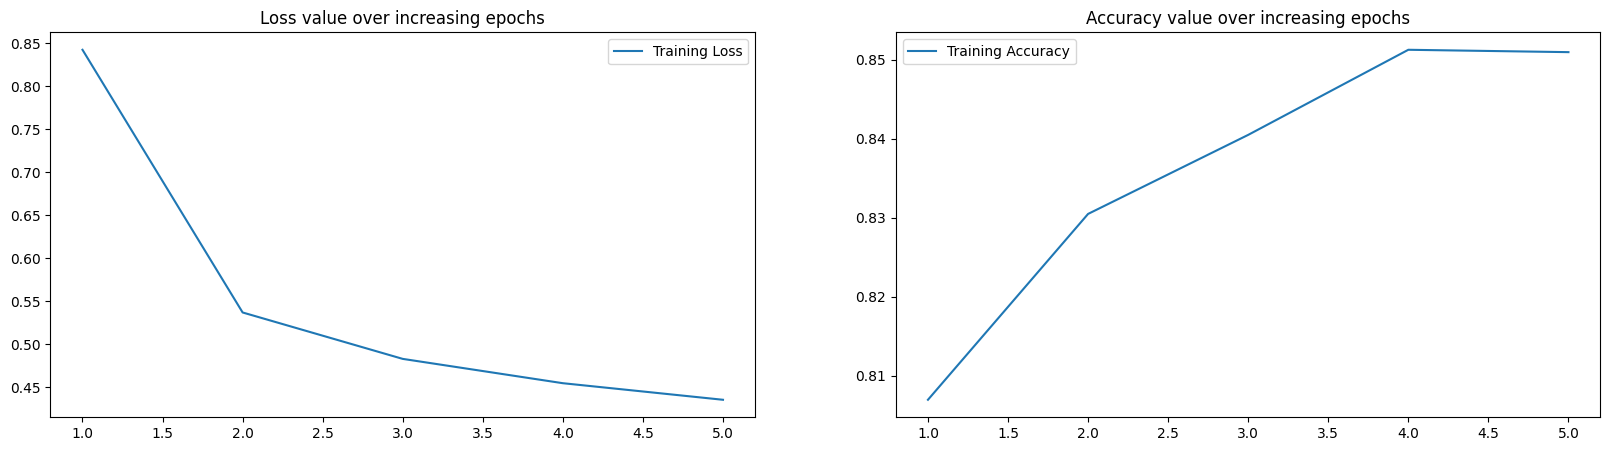

In [17]:
# The variation of the training loss and accuracy over increasing epochs can be displayed
epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.legend()
plt.show()

As we can see, the training loss consistently reduced and the training accuracyconsistently increased, thus increasing the epochs to an accuracy of ~85%.
Contrast the preceding output with the scenario where input data is not scaled, wheretraining loss did not reduce consistently, and the accuracy of the training dataset atthe end of five epochs was only 12%.

* In the following table, we've calculated the Sigmoid column based on the sigmoid formula

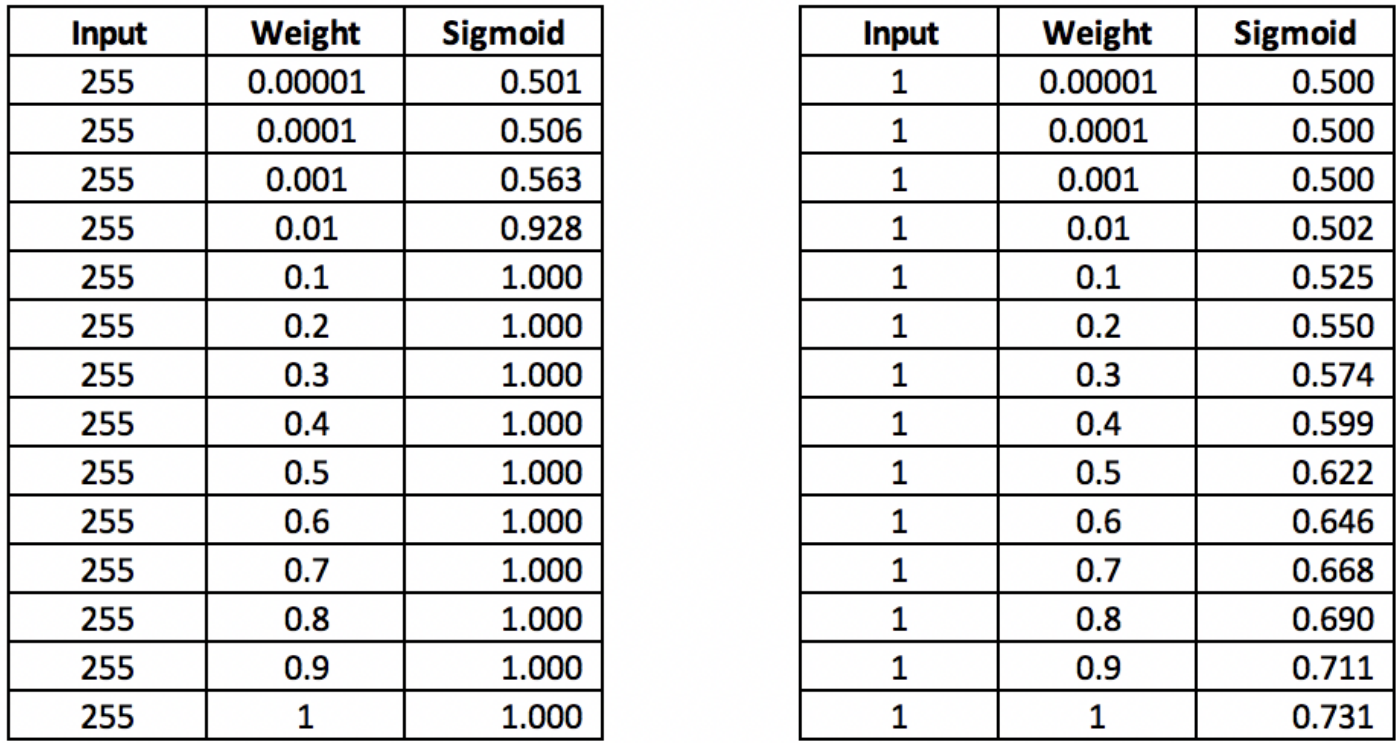

In the left-hand table, we can see that when the weight values are more than 0.1, the Sigmoid value does not vary with an increasing (changing) weight value. Furthermore, the Sigmoid value changed only by a little when the weight was extremely small; the only way to vary the sigmoid value is by having the weight change to a very, very small amount.

However, the Sigmoid value changed considerably in the right-hand table when the input value was small.

    The reason for this is that the exponential of a larg negative value (resulting from multiplying the weight value by a large number) is very close to 0, while the exponential value varies when the weight is multiplied by a scaled input, as seen in the right-hand table.

---

# Understanding the impact of varying the batch size

### 1. Batch size of 32

In [2]:
# 1. Download and import the training images and targets
from torchvision import datasets
import torch


## folder path to download data
data_folder ='Dataset/FMNIST/'

## download FMNIST
fmnist = datasets.FashionMNIST(root=data_folder, download=True,train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets

# 2. In a similar manner to training images, we must download and import the validation dataset by specifying train = False 
val_fmnist =datasets.FashionMNIST(data_folder,download=True,train=False)

val_images = val_fmnist.data
val_targets = val_fmnist.targets

# 3. Import the relevant packages and define device
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 4. Define the dataset class (FashionMNIST), the functions that will be used totrain on a batch of data (train_batch), calculate the accuracy (accuracy),and then define the model architecture, the loss function, and the optimizer(get_model).
class FMNISTDataset(Dataset):
    def __init__(self, x,y):
        self.x = (x.float()/255).view(-1,28*28)
        self.y = y
    def __getitem__(self, ix):
        x,y = self.x[ix],self.y[ix]
        return x.to(device),y.to(device)
    def __len__(self):
        return len(self.x)
    
## Define the model
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28,1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    optimizer = Adam(model.parameters(),lr=1e-2)
    loss_fn = nn.CrossEntropyLoss()
    return model,loss_fn,optimizer
## Define the functions for training and validating a batch of data
def train_batch(x, y, model ,opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction,y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()

@torch.inference_mode()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()


# 5. Define a function that will get data; that is, get_data. This function will return the training data with a batch size of 32 and the validation dataset with a batch size that's the length of the validation data
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

# 6. Define a function that calculates the loss of the validation data; thati s, val_loss.
@torch.inference_mode()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

# 7. Fetch the training and validation DataLoaders. Also, initialize the model, loss function, and optimize
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

# 8. Train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


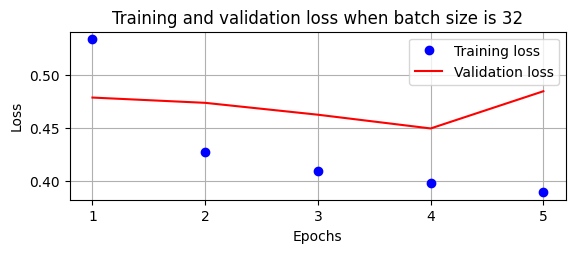

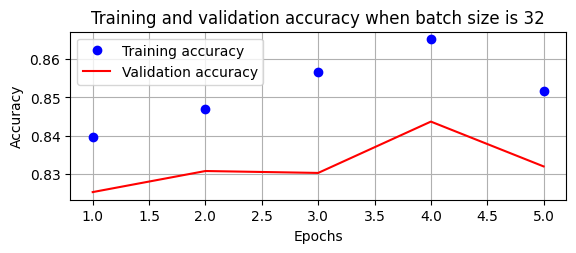

In [19]:
# 9. Visualize the improvements in the accuracy and loss values in the training and validation datasets over increasing epochs
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy when batch size is 32')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

### 2. Batch size of 10000

In [20]:
# 1. Download and import the training images and targets
from torchvision import datasets
import torch


## folder path to download data
data_folder ='Dataset/FMNIST/'

## download FMNIST
fmnist = datasets.FashionMNIST(root=data_folder, download=True,train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets

# 2. In a similar manner to training images, we must download and import the validation dataset by specifying train = False 
val_fmnist =datasets.FashionMNIST(data_folder,download=True,train=False)

val_images = val_fmnist.data
val_targets = val_fmnist.targets

# 3. Import the relevant packages and define device
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 4. Define the dataset class (FashionMNIST), the functions that will be used totrain on a batch of data (train_batch), calculate the accuracy (accuracy),and then define the model architecture, the loss function, and the optimizer(get_model).
class FMNISTDataset(Dataset):
    def __init__(self, x,y):
        self.x = (x.float()/255).view(-1,28*28)
        self.y = y
    def __getitem__(self, ix):
        x,y = self.x[ix],self.y[ix]
        return x.to(device),y.to(device)
    def __len__(self):
        return len(self.x)
    
## Define the model
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28,1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    optimizer = Adam(model.parameters(),lr=1e-2)
    loss_fn = nn.CrossEntropyLoss()
    return model,loss_fn,optimizer
## Define the functions for training and validating a batch of data
def train_batch(x, y, model ,opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction,y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()

@torch.inference_mode()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()


# 5. Define a function that will get data; that is, get_data. This function will return the training data with a batch size of 32 and the validation dataset with a batch size that's the length of the validation data
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=10000, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

# 6. Define a function that calculates the loss of the validation data; thati s, val_loss.
@torch.inference_mode()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

# 7. Fetch the training and validation DataLoaders. Also, initialize the model, loss function, and optimize
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

# 8. Train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


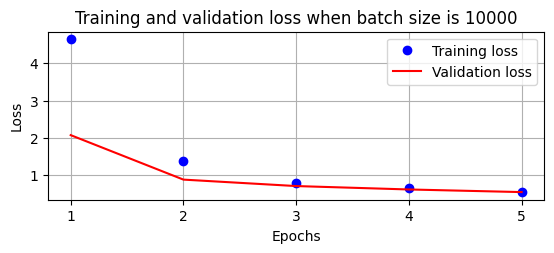

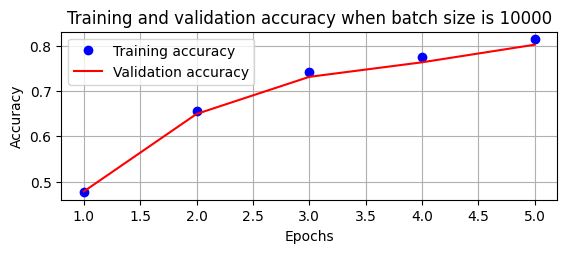

In [21]:
# 9. Visualize the improvements in the accuracy and loss values in the training and validation datasets over increasing epochs
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss when batch size is 10000')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy when batch size is 10000')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

    Here, we can see that the accuracy and loss values did not reach the same levels as that of the previous scenario, where the batch size was 32, because the time weights are updated fewer times when the batch size is 32 (1875). In the scenario where the batch size is 10,000, there were six weight updates per epoch since there were 10,000 data points per batch, which means that the total training data size was 60,000.

**Note**: Having a lower batch size generally helps in achieving optimal accuracy when you have a small number of epochs, but it should not be so low that training time is impacted. 

---

# Understanding the impact of varying the loss optimizer

#### In this section, we will do the following:
1. Modify the optimizer so that it becomes a Stochastic Gradient Descent (SGD) optimizer

2. Revert to a batch size of 32 while fetching data in the DataLoader

3. Increase the number of epochs to 10 (so that we can compare the performance of SGD and Adam over a longer number of epochs)

### SGD optimizer

In [22]:
# 1. Download and import the training images and targets
from torchvision import datasets
import torch


## folder path to download data
data_folder ='Dataset/FMNIST/'

## download FMNIST
fmnist = datasets.FashionMNIST(root=data_folder, download=True,train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets

# 2. In a similar manner to training images, we must download and import the validation dataset by specifying train = False 
val_fmnist =datasets.FashionMNIST(data_folder,download=True,train=False)

val_images = val_fmnist.data
val_targets = val_fmnist.targets

# 3. Import the relevant packages and define device
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 4. Define the dataset class (FashionMNIST), the functions that will be used totrain on a batch of data (train_batch), calculate the accuracy (accuracy),and then define the model architecture, the loss function, and the optimizer(get_model).
class FMNISTDataset(Dataset):
    def __init__(self, x,y):
        self.x = (x.float()/255).view(-1,28*28)
        self.y = y
    def __getitem__(self, ix):
        x,y = self.x[ix],self.y[ix]
        return x.to(device),y.to(device)
    def __len__(self):
        return len(self.x)
    
## Define the model
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28,1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    optimizer = SGD(model.parameters(),lr=1e-2)
    loss_fn = nn.CrossEntropyLoss()
    return model,loss_fn,optimizer
## Define the functions for training and validating a batch of data
def train_batch(x, y, model ,opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction,y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()

@torch.inference_mode()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()


# 5. Define a function that will get data; that is, get_data. This function will return the training data with a batch size of 32 and the validation dataset with a batch size that's the length of the validation data
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

# 6. Define a function that calculates the loss of the validation data; thati s, val_loss.
@torch.inference_mode()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

# 7. Fetch the training and validation DataLoaders. Also, initialize the model, loss function, and optimize
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

# 8. Train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(10):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9


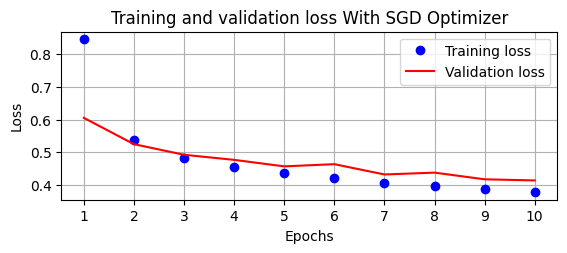

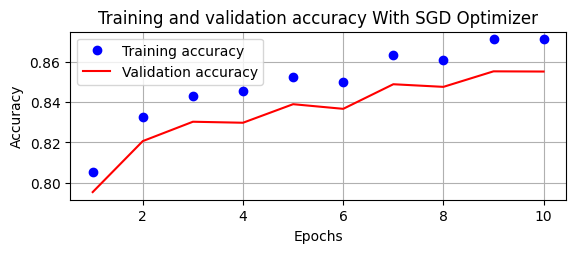

In [23]:
# 9. Visualize the improvements in the accuracy and loss values in the training and validation datasets over increasing epochs
epochs = np.arange(10)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss With SGD Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy With SGD Optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

### Adam optimizer

In [24]:
from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-2)
    return model, loss_fn, optimizer

# 7. Fetch the training and validation DataLoaders. Also, initialize the model, loss function, and optimize
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

# 8. Train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(10):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9


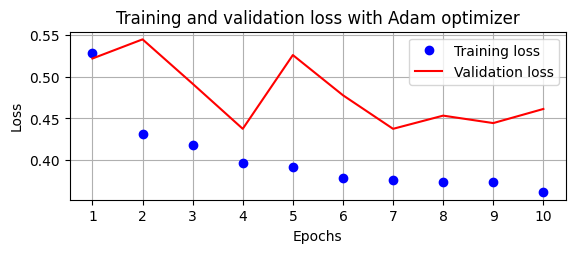

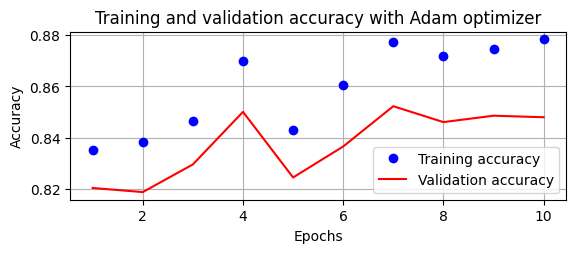

In [25]:
# 9. Visualize the improvements in the accuracy and loss values in the training and validation datasets over increasing epochs
epochs = np.arange(10)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with Adam optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with Adam optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

As you can see, when we used the Adam optimizer, the accuracy was still very close to 85%. However, note that so far, the learning rate has been 0.01.

    Certain optimizers achieve optimal accuracy faster compared to others. Adam generally achieves optimal accuracy faster. Some ofthe other prominent optimizers that are available include Adagrad, Adadelta, AdamW, LBFGS, and RMSprop.

---

# Understanding the impact of varying the learning rate

we learned that the learning rate plays a key role in attaining optimal weight values. Here, the weight values gradually move toward the optimal value when the learning rate is small, while the weight value oscillates at a non-optimal value when the learning rate is large

##### To understand the impact of the varying learning rate, we'll go through the following scenario:

1. Higher learning rate (0.1) on a scaled dataset

2. Lower learning rate (0.00001) on a scaled dataset

3. Lower learning rate (0.001) on a non-scaled dataset

4. Higher learning rate (0.1) on a non-scaled dataset

##### 1. Impact of the learning rate on a scaled dataset

### a. High Learning Rate

In [26]:
from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-1)
    return model, loss_fn, optimizer

# 7. Fetch the training and validation DataLoaders. Also, initialize the model, loss function, and optimize
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

# 8. Train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


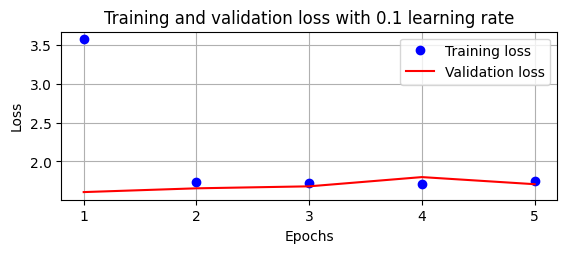

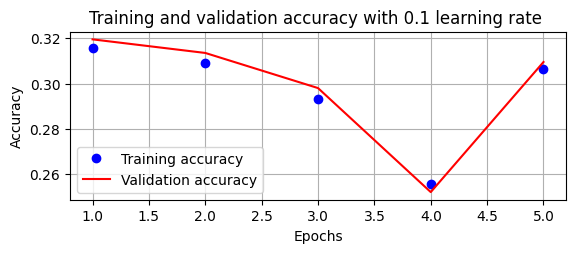

In [27]:
# 9. Visualize the improvements in the accuracy and loss values in the training and validation datasets over increasing epochs
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with 0.1 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with 0.1 learning rate ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

Note that the accuracy of the validation dataset is ~25% (contrast this accuracy with the ~85% accuracy we achieved when the learning rate was 0.01).

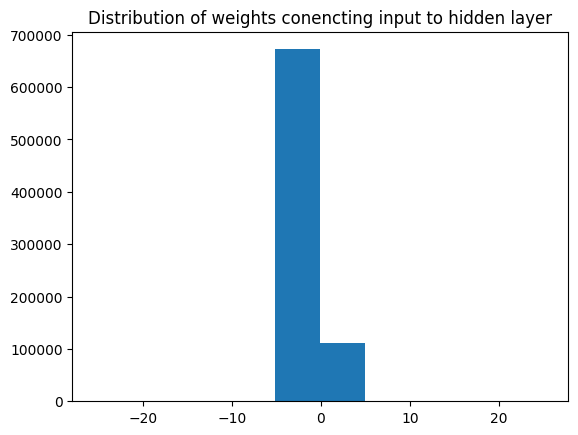

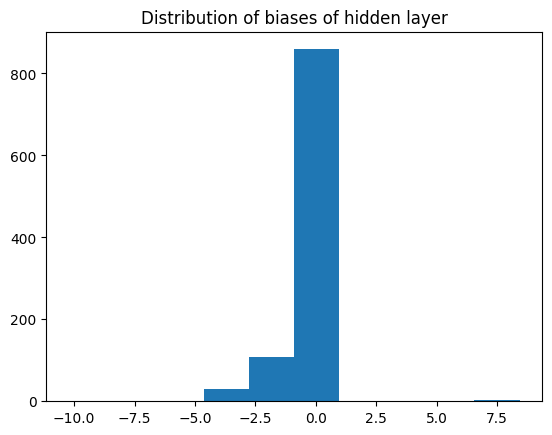

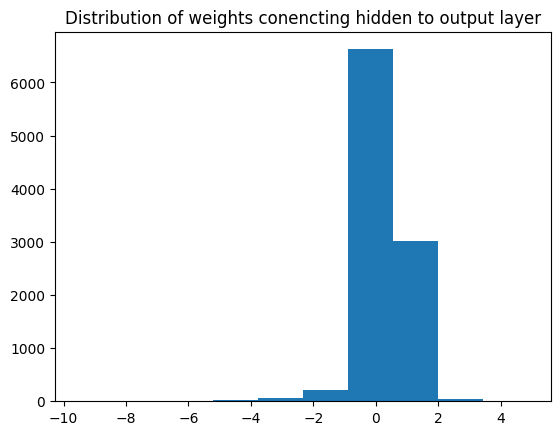

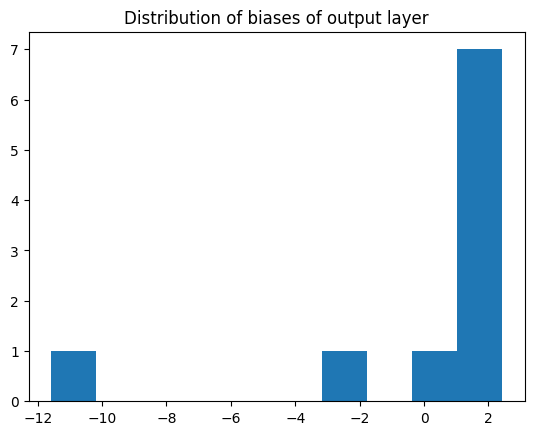

In [28]:
for ix, par in enumerate(model.parameters()):
    if(ix==0):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of weights conencting input to hidden layer')
        plt.show()
    elif(ix ==1):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of biases of hidden layer')
        plt.show()
    elif(ix==2):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of weights conencting hidden to output layer')
        plt.show()
    elif(ix ==3):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of biases of output layer')
        plt.show() 

### b. Medium Learning Rate

In [29]:
from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

# 7. Fetch the training and validation DataLoaders. Also, initialize the model, loss function, and optimize
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

# 8. Train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


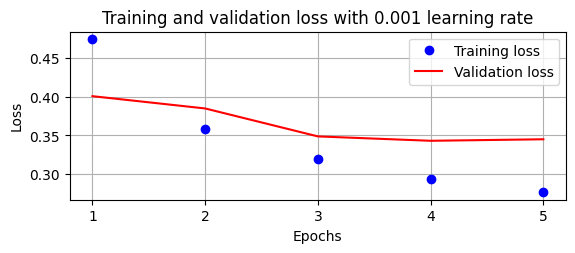

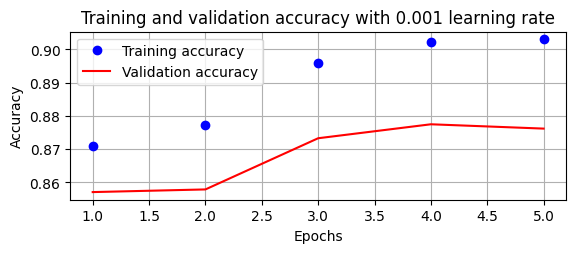

In [30]:
# 9. Visualize the improvements in the accuracy and loss values in the training and validation datasets over increasing epochs
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with 0.001 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with 0.001 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

From the preceding output, we can see that the model was trained successfully when the learning rate (or) was reduced from 0.1 to 0.001

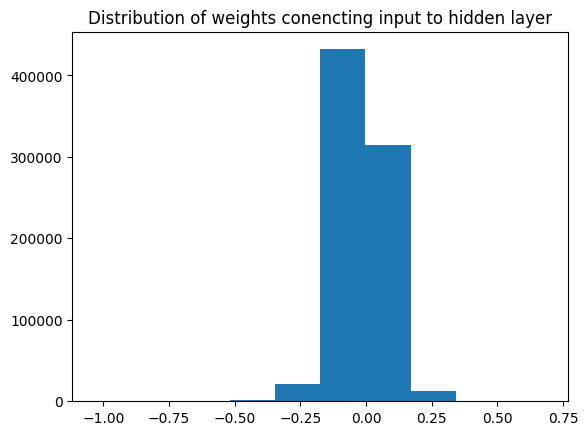

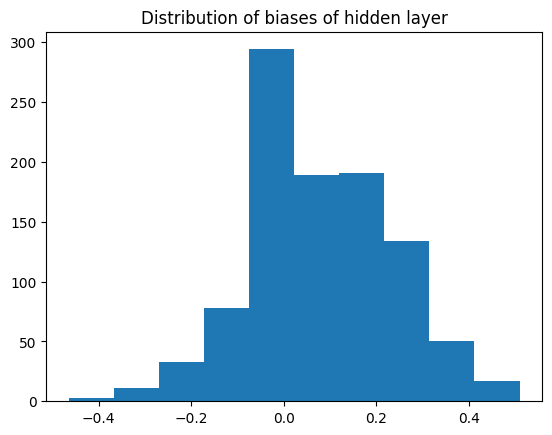

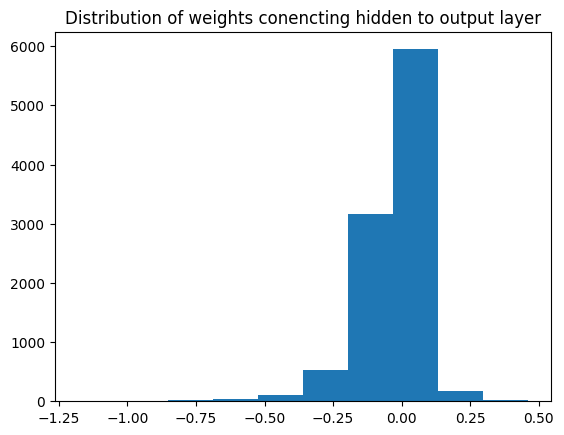

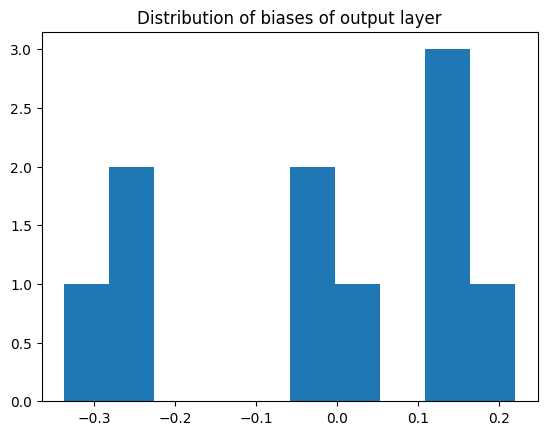

In [31]:
for ix, par in enumerate(model.parameters()):
    if(ix==0):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of weights conencting input to hidden layer')
        plt.show()
    elif(ix ==1):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of biases of hidden layer')
        plt.show()
    elif(ix==2):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of weights conencting hidden to output layer')
        plt.show()
    elif(ix ==3):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of biases of output layer')
        plt.show() 

### c. Low learning rate

In [32]:
from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-5)
    return model, loss_fn, optimizer

# 7. Fetch the training and validation DataLoaders. Also, initialize the model, loss function, and optimize
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

# 8. Train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


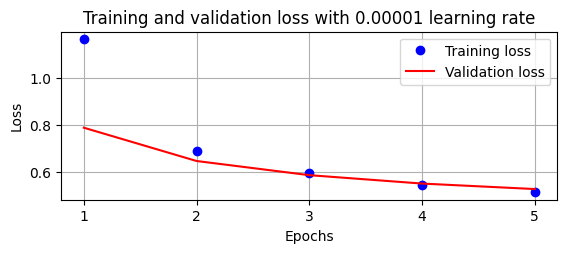

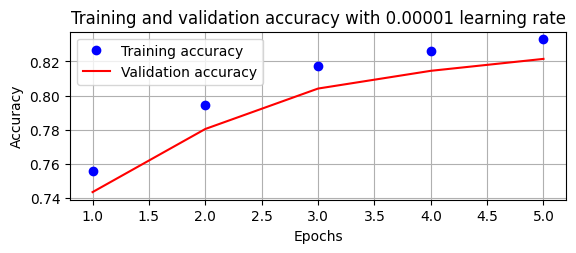

In [33]:
# 9. Visualize the improvements in the accuracy and loss values in the training and validation datasets over increasing epochs
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with 0.00001 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with 0.00001 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

From the preceding image, we can see that the model learned far slower compared to the previous scenario (medium learning rate). Here, it took ~100 epochs to reach an accuracy of ~89% compared to eight epochs when the learning rate was 0.001.

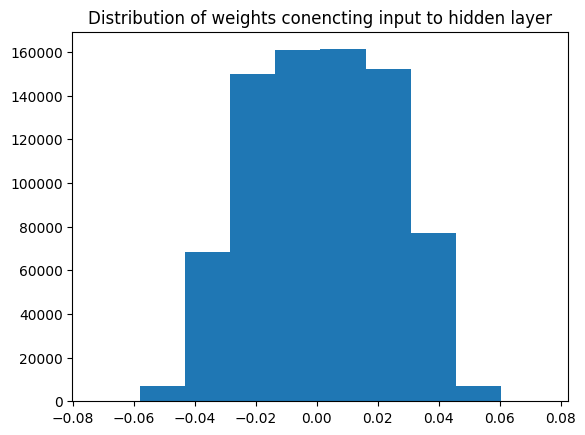

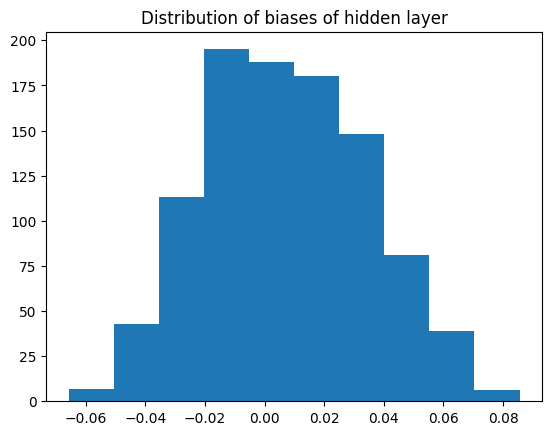

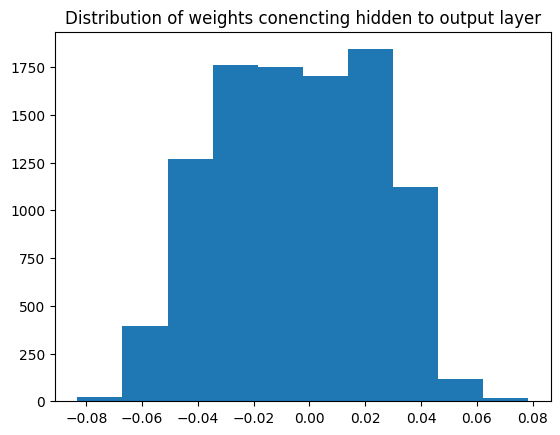

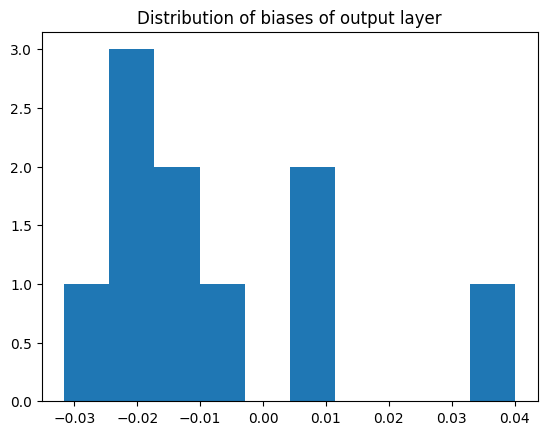

In [34]:
for ix, par in enumerate(model.parameters()):
    if(ix==0):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of weights conencting input to hidden layer')
        plt.show()
    elif(ix ==1):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of biases of hidden layer')
        plt.show()
    elif(ix==2):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of weights conencting hidden to output layer')
        plt.show()
    elif(ix ==3):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of biases of output layer')
        plt.show() 

    When the learning rate is low, the smaller weight updates during training prevent a quick widening of the gap between the training and validation loss, resulting in a much smaller disparity between these two metrics compared to scenarios with higher learning rates.

#### Parameter distribution across layers for different learning rates

1. High learning rate (0.1) led to underfitting, preventing effective training of the model, resulting in poor performance.

2. Medium learning rate (0.001) facilitated quick overfitting, achieving high accuracy rapidly but sacrificing generalization.

3. Low learning rate (0.00001) took longer to reach high accuracy, yet it eventually achieved comparable performance to the medium learning rate model while avoiding overfitting by allowing for a slower, more stable learning process.

 **parameter distribution can be a good indicator of model overfit and underfit**

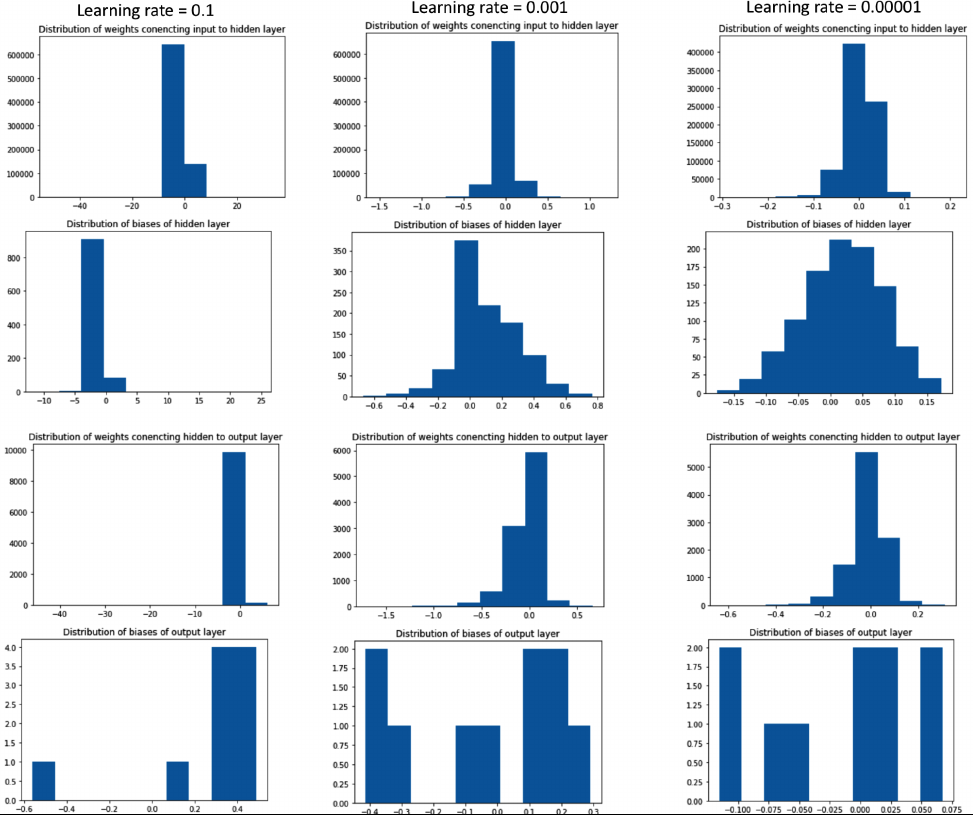

* When the learning rate is high, parameters have a much higher distribution compared to medium and low learning rates.

* When parameters have a bigger distribution, overfitting occurs.

---

# Impact of varying the learning rate on a non- scaled dataset

In [35]:
class FMNISTDataset(Dataset):
    def __init__(self, x,y):
        self.x = x.float().view(-1,28*28)
        self.y = y
    def __getitem__(self, ix):
        x,y = self.x[ix],self.y[ix]
        return x.to(device),y.to(device)
    def __len__(self):
        return len(self.x)

##### 2. Impact of the learning rate on a non-scaled dataset

### a. High Learning Rate

In [36]:
from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-1)
    return model, loss_fn, optimizer

# 7. Fetch the training and validation DataLoaders. Also, initialize the model, loss function, and optimize
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

# 8. Train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


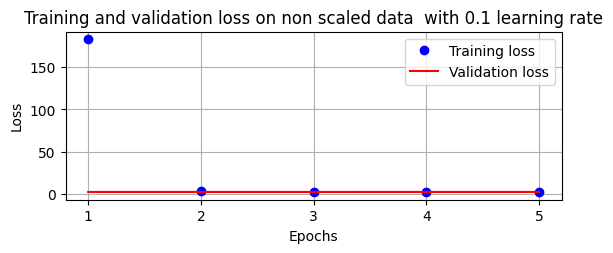

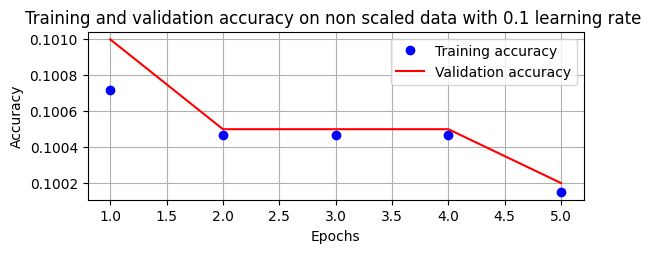

In [37]:
# 9. Visualize the improvements in the accuracy and loss values in the training and validation datasets over increasing epochs
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss on non scaled data  with 0.1 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy on non scaled data with 0.1 learning rate ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

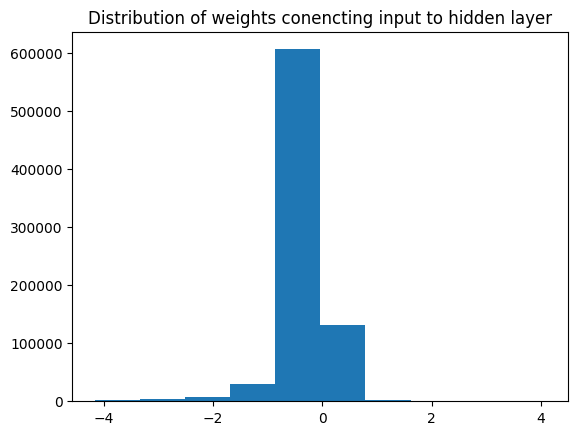

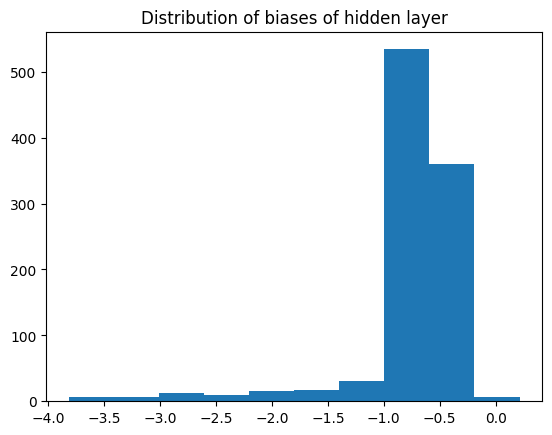

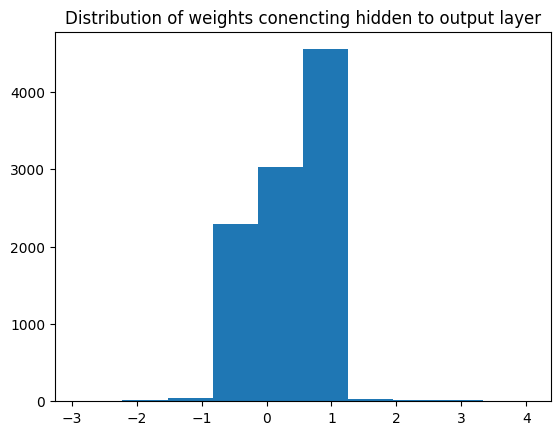

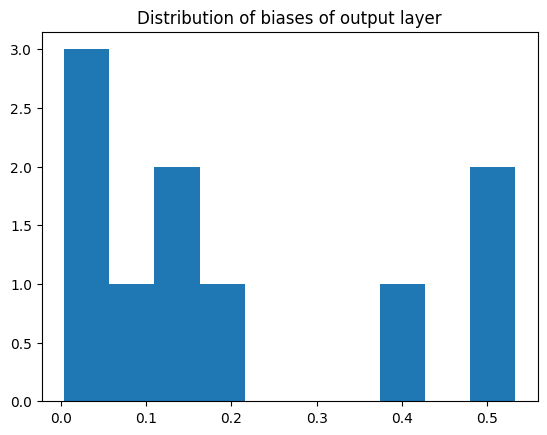

In [38]:
for ix, par in enumerate(model.parameters()):
    if(ix==0):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of weights conencting input to hidden layer')
        plt.show()
    elif(ix ==1):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of biases of hidden layer')
        plt.show()
    elif(ix==2):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of weights conencting hidden to output layer')
        plt.show()
    elif(ix ==3):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of biases of output layer')
        plt.show() 

### b. Medium Learning Rate

In [39]:
from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

# 7. Fetch the training and validation DataLoaders. Also, initialize the model, loss function, and optimize
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

# 8. Train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


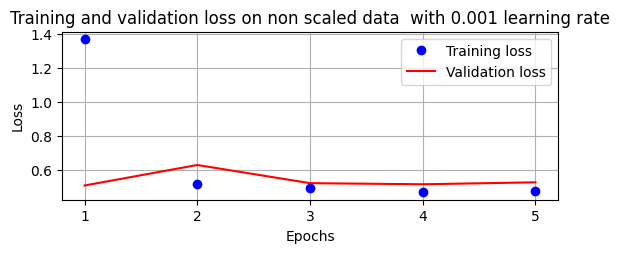

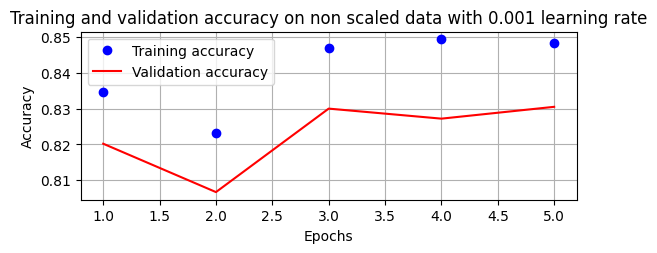

In [40]:
# 9. Visualize the improvements in the accuracy and loss values in the training and validation datasets over increasing epochs
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss on non scaled data  with 0.001 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy on non scaled data with 0.001 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

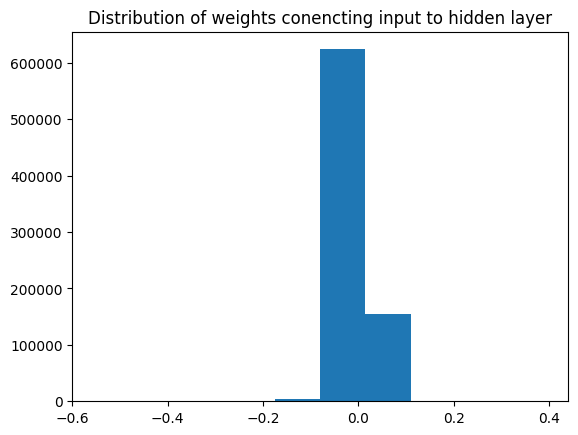

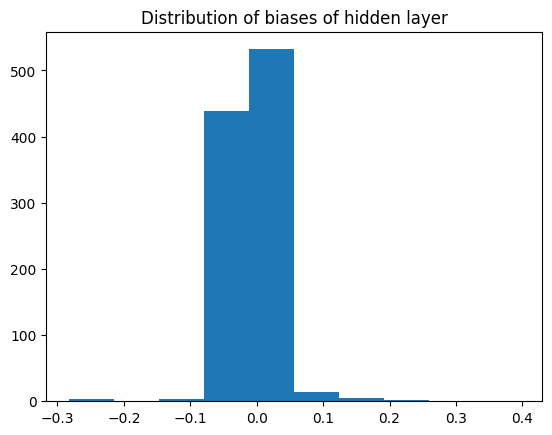

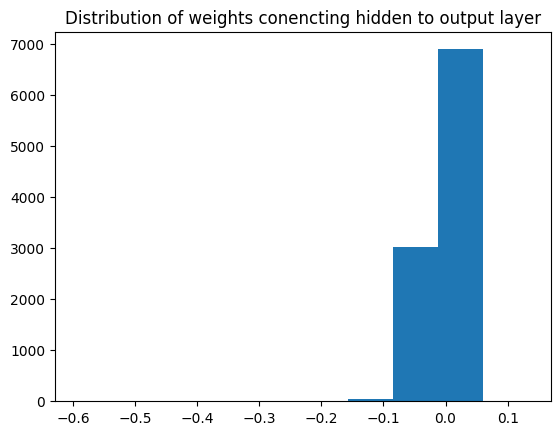

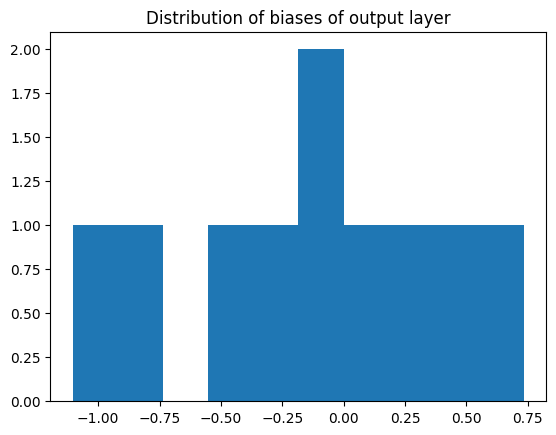

In [41]:
for ix, par in enumerate(model.parameters()):
    if(ix==0):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of weights conencting input to hidden layer')
        plt.show()
    elif(ix ==1):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of biases of hidden layer')
        plt.show()
    elif(ix==2):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of weights conencting hidden to output layer')
        plt.show()
    elif(ix ==3):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of biases of output layer')
        plt.show() 

### c. Low learning rate

In [42]:
from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-5)
    return model, loss_fn, optimizer

# 7. Fetch the training and validation DataLoaders. Also, initialize the model, loss function, and optimize
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

# 8. Train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


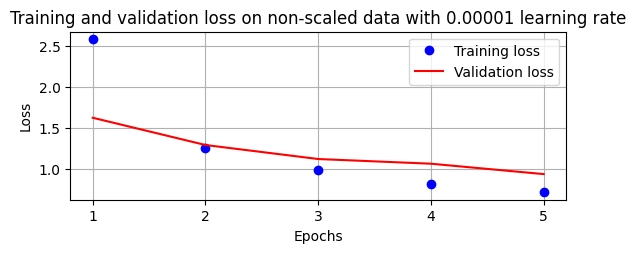

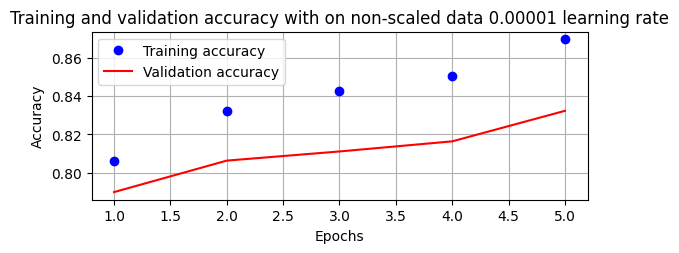

In [43]:
# 9. Visualize the improvements in the accuracy and loss values in the training and validation datasets over increasing epochs
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss on non-scaled data with 0.00001 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with on non-scaled data 0.00001 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

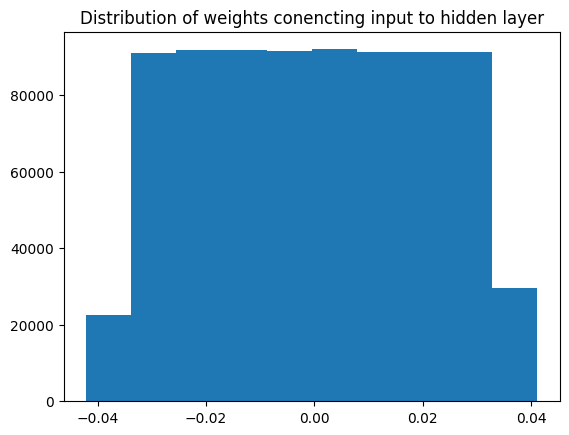

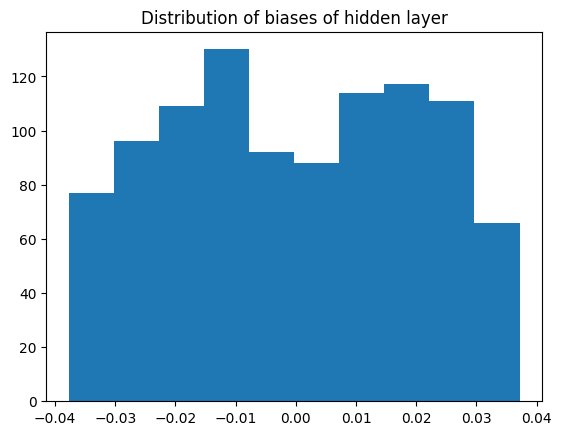

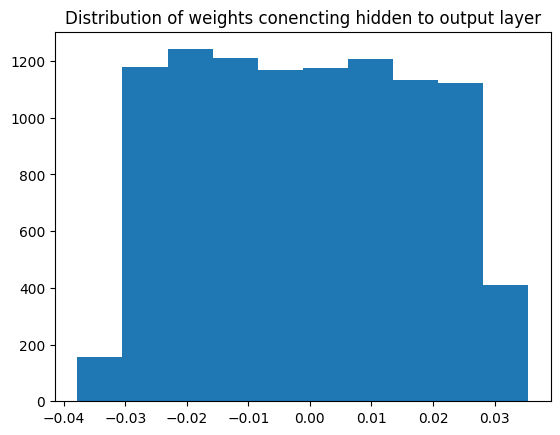

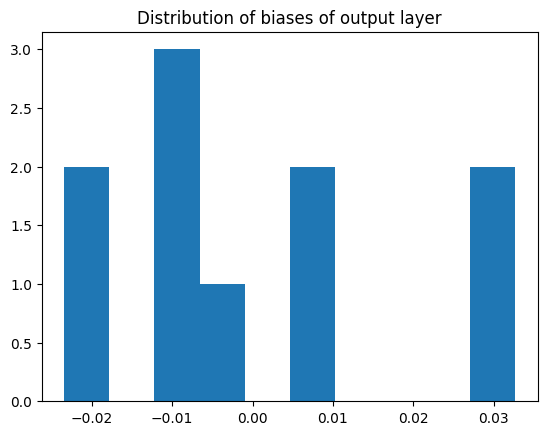

In [44]:
for ix, par in enumerate(model.parameters()):
    if(ix==0):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of weights conencting input to hidden layer')
        plt.show()
    elif(ix ==1):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of biases of hidden layer')
        plt.show()
    elif(ix==2):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of weights conencting hidden to output layer')
        plt.show()
    elif(ix ==3):
        plt.hist(par.cpu().detach().numpy().flatten())
        plt.title('Distribution of biases of output layer')
        plt.show() 

As we can see, even when the dataset is non-scaled, we were not able to train an accurate model when the learning rate was 0.1. Furthermore, the accuracy was not as high as in the previous section when the learning rate was 0.001.

Finally, when the learning rate was very small (0.00001), the model was able to learn as well as it did in previous sections, but this time overfitted on the training data.

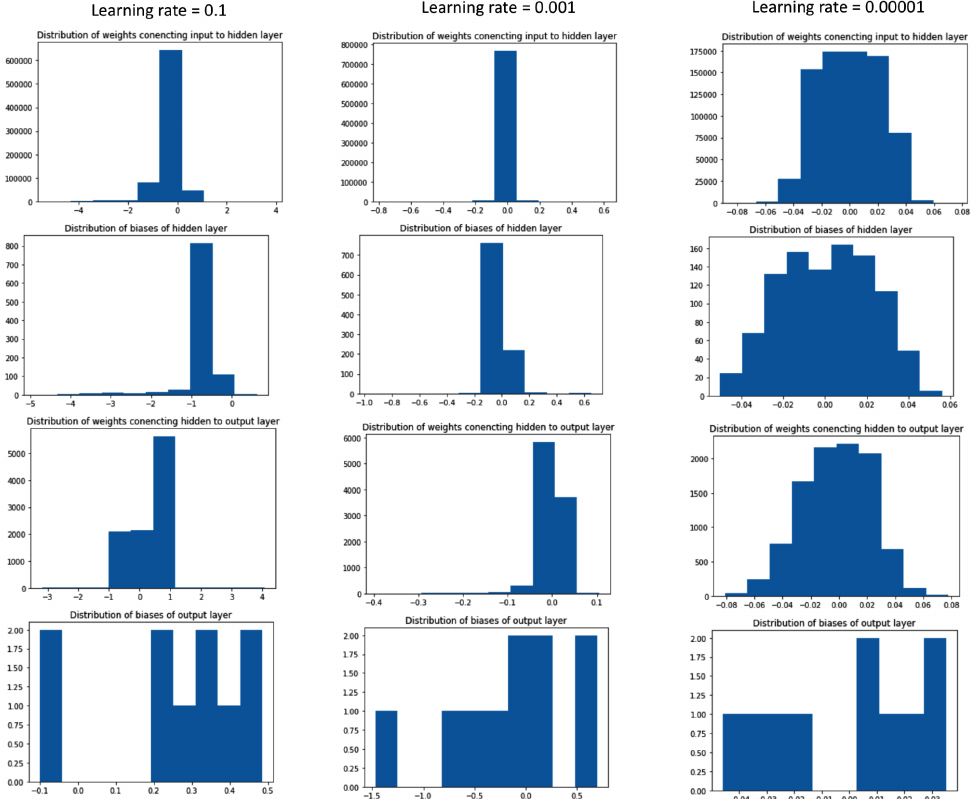

* we can see that when the model accuracy was high (which is when the learning rate was 0.00001), the weights had a much smaller range (typically ranging between -0.05 to 0.05 in this case) compared to when the learning rate was high.

    The weights can be tuned toward a small value since the learning rate is small. Note that the scenario where the learning rate is 0.00001 on a non-scaled dataset is equivalent to the scenario of the learning rate being 0.001 on a scaled dataset. This is because the weights can now move toward a very small value (because gradient * learning rate is a very small value, given that the learning rate is small).

***Now that we have established that having a high learning rate is not likely to yield the best possible results on both scaled and non-scaled datasets**

---

# Understanding the impact of learning rate annealing

* Maintaining a consistent learning rate throughout training might not be optimal as it's more efficient to start with a higher learning rate initially to allow rapid weight adjustments for faster convergence, and then gradually decrease the learning rate as the model approaches an optimal state due to diminishing returns in loss reduction.

*  To enhance training efficiency, it's advisable to adopt a dynamic learning rate strategy that starts high to enable quick convergence in early epochs and progressively decreases as the model approaches an optimal state, aligning with the diminishing improvements in reducing loss.

One potential way we can solve this problem is by continually monitoring the validation loss and if the validation loss does not decrease (let's say, over the previous x epochs), then we reduce the learning rate.

In [45]:
# PyTorch provides us with tools we can use to perform learning rate reduction when the validation loss does not decrease in the previous "x" epochs.
# Here, we can use the lr_scheduler method:
from torch import optim

scheduler = optim.lr_scheduler.ReduceLROnPlateau(
                                            optimizer=optimizer,
                                            factor=0.5,patience=0,
                                            threshold=0.001,
                                            verbose=True,
                                            min_lr= 1e-5,
                                            threshold_mode='abs')

In the preceding code, we are specifying that we're reducing the learning rate parameter of `optimizer` by a `factor` of 0.5 if a certain value does not improve over the next n epochs (where n is 0 in this case) by a `threshold` (which in this case is 0.001). Finally, we are specifying that the learning rate, `min_lr` (given that it is reducing by a factor of 0.5), cannot be below 1e-5 and that `threshold_mode` should be absolute to ensure that a minimum threshold of 0.001 is crossed.

In [46]:
# 1. Download and import the training images and targets
from torchvision import datasets
import torch
from torch import optim

## folder path to download data
data_folder ='Dataset/FMNIST/'

## download FMNIST
fmnist = datasets.FashionMNIST(root=data_folder, download=True,train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets

# 2. In a similar manner to training images, we must download and import the validation dataset by specifying train = False 
val_fmnist =datasets.FashionMNIST(data_folder,download=True,train=False)

val_images = val_fmnist.data
val_targets = val_fmnist.targets

# 3. Import the relevant packages and define device
import matplotlib.pyplot as plt
import numpy as np
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 4. Define the dataset class (FashionMNIST), the functions that will be used totrain on a batch of data (train_batch), calculate the accuracy (accuracy),and then define the model architecture, the loss function, and the optimizer(get_model).
class FMNISTDataset(Dataset):
    def __init__(self, x,y):
        self.x = (x.float()/255).view(-1,28*28)
        self.y = y
    def __getitem__(self, ix):
        x,y = self.x[ix],self.y[ix]
        return x.to(device),y.to(device)
    def __len__(self):
        return len(self.x)
    
## Define the model
def get_model():
    model = nn.Sequential(
        nn.Linear(28*28,1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    optimizer = SGD(model.parameters(),lr=1e-2)
    loss_fn = nn.CrossEntropyLoss()
    return model,loss_fn,optimizer
## Define the functions for training and validating a batch of data
def train_batch(x, y, model ,opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction,y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()

@torch.inference_mode()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()


# 5. Define a function that will get data; that is, get_data. This function will return the training data with a batch size of 32 and the validation dataset with a batch size that's the length of the validation data
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

# 6. Define a function that calculates the loss of the validation data; thati s, val_loss.
@torch.inference_mode()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

# 7. Fetch the training and validation DataLoaders. Also, initialize the model, loss function, and optimize
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

# 8. define scheduler 
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
                                            optimizer=optimizer,
                                            factor=0.5,patience=0,
                                            threshold=0.001,
                                            verbose=True,
                                            min_lr= 1e-5,
                                            threshold_mode='abs')

# 9. Train the model
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(30):
    #print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
        scheduler.step(validation_loss)
    val_epoch_accuracy = np.mean(val_is_correct)

    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

Epoch 00006: reducing learning rate of group 0 to 5.0000e-03.
Epoch 00009: reducing learning rate of group 0 to 2.5000e-03.
Epoch 00012: reducing learning rate of group 0 to 1.2500e-03.
Epoch 00017: reducing learning rate of group 0 to 6.2500e-04.
Epoch 00019: reducing learning rate of group 0 to 3.1250e-04.
Epoch 00020: reducing learning rate of group 0 to 1.5625e-04.
Epoch 00021: reducing learning rate of group 0 to 7.8125e-05.
Epoch 00023: reducing learning rate of group 0 to 3.9063e-05.
Epoch 00024: reducing learning rate of group 0 to 1.9531e-05.
Epoch 00025: reducing learning rate of group 0 to 1.0000e-05.


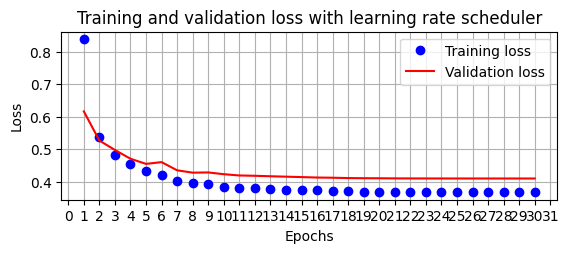

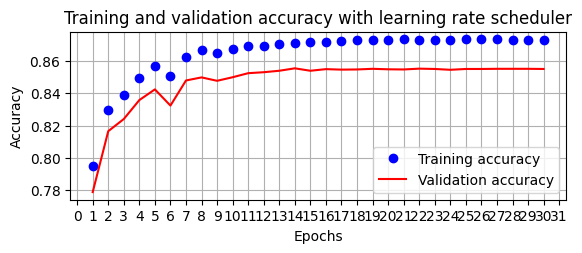

In [47]:
epochs = np.arange(30)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with learning rate scheduler')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with learning rate scheduler')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

Furthermore, we did not have any huge overfitting issues, even though we trained the model for 100 epochs. This is because the learning rate became so small that the weight update was very small, resulting in a smaller gap between the training and validation accuracies (when compared with the scenario where we had 100 epochs without learning rate annealing, where the training accuracy was close to 100% while the validation accuracy was close to ~89%).



----

# Building a deeper neural network

1. Model with 2 hidden layers

In [48]:
# build an neural network with 2 hidden layer 
def get_model():
    model = nn.Sequential(
                        nn.Linear(28*28,1000),
                        nn.ReLU(),
                        nn.Linear(1000,1000),
                        nn.Linear(1000,10)
                        ).to(device=device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(),lr=1e-3)
    return model, loss_fn, optimizer

model, loss_fn, optimizer = get_model()

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


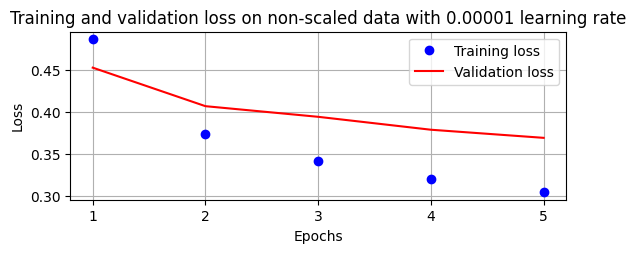

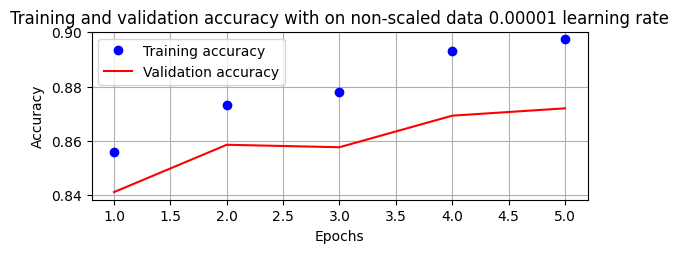

In [49]:
# 9. Visualize the improvements in the accuracy and loss values in the training and validation datasets over increasing epochs
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss on non-scaled data with 0.00001 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with on non-scaled data 0.00001 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

2. Model with 0 hidden layers

In [50]:
def get_model():
    model = nn.Sequential(
                        nn.Linear(28*28,10)
                        ).to(device=device)
    optimizer = Adam(model.parameters(),lr=1e-3)
    return model, loss_fn, optimizer

model, loss_fn, optimizer = get_model()

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(5):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4


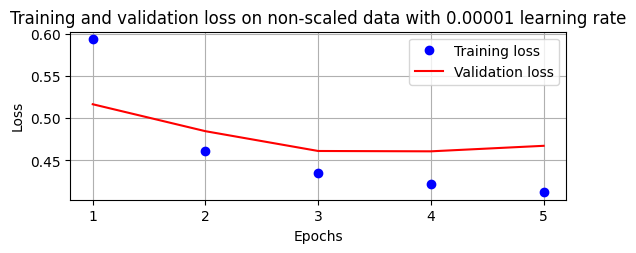

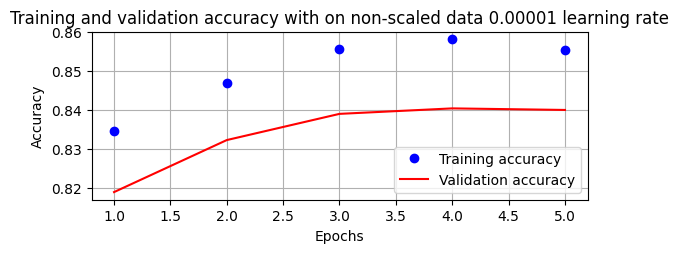

In [51]:
# 9. Visualize the improvements in the accuracy and loss values in the training and validation datasets over increasing epochs
epochs = np.arange(5)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss on non-scaled data with 0.00001 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with on non-scaled data 0.00001 learning rate')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

##### Here, take note of the following:

* The model was unable to learn as well as when there were no hidden layers.

* The model overfit by a larger amount when there were two hidden layers compared to one hidden layer (the validation loss is higher in the model with two layers compared to the model with one layer).

     So far, across different sections, we have seen that the model was unable to be trained well when the input data wasn't scaled (brought down to a small range). Non-scaled data (data with a higher range) can also occur in hidden layers (especially when we have deep neural networks with multiple hidden layers) because of the matrix multiplication that's involved in getting the values of nodes in hidden layers.


----

# Understanding the impact of batch normalization

1. In scenarios with large input values, considerable changes in weight values have minimal impact on the variation of the Sigmoid output, whereas small changes in the input significantly affect weight values when the input is small.

2. Scaling the input data showed that extreme input values negatively affect training accuracy, indicating that both very small and very large input values can adversely impact model performance. Therefore, maintaining a balance in input values is crucial for effective training.

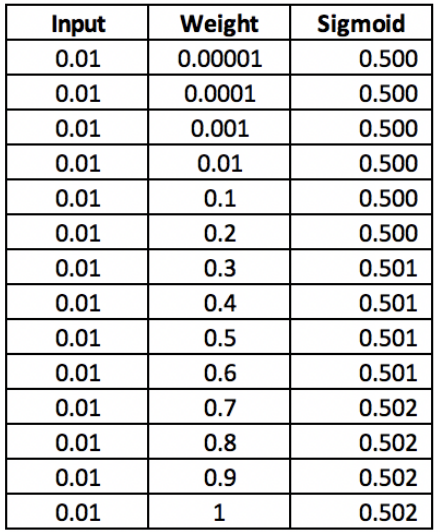

`Along with very small or very big values in input`, we may also encounter a scenario where the value of one of the nodes in the hidden layer could result in either a very small number or a very large number, resulting in the same issue we saw previously with the weights connecting the hidden layer to the next layer. Batch normalization comes to the rescue in such a scenario since it normalizes the values at each node, just like when we scaled our input values.

**All the input values in a batch are scaled as follows**: 

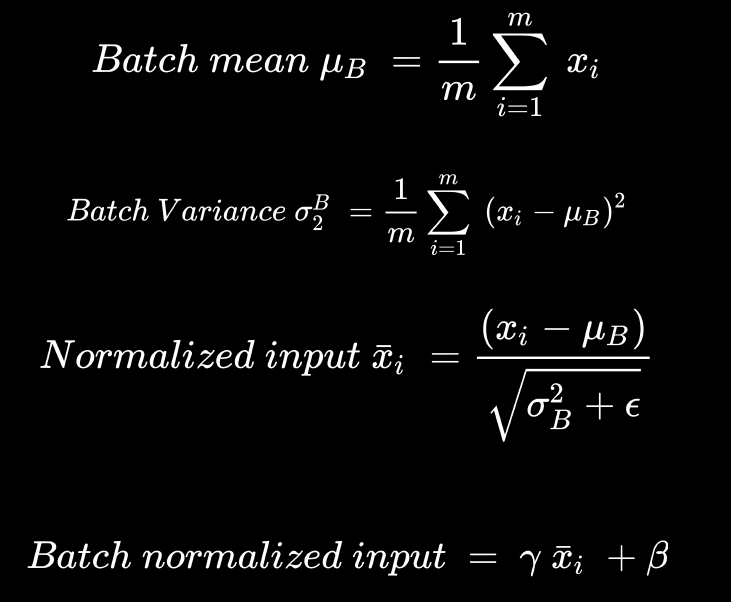

---

# Very small input values without batch normalization

 we'll change the scaling that typically we do in the FMNISTDataset class by reducing the range of input values from 0 to 0.0001, as follows:

In [52]:
from torch.optim import Adam

In [53]:
class FMNISTDataset(Dataset):
    def __init__(self,x,y):
        self.x = (x.float()/(255*10000)).view(-1,28*28)
        self.y = y
    def __getitem__(self, ix):
        x ,y = self.x[ix],self.y[ix]
        return x.to(device),y.to(device)
    def __len__(self):
        return len(self.x)

In [54]:
# Redefine the get_model function so that we can fetch the model's prediction, as well as the values for the hidden layer.
def get_model():
    class neuralnet(nn.Module):
        def __init__(self):
            super().__init__()
            self.input_to_hidden_layer = nn.Linear(784,1000)
            self.hidden_layer_activation = nn.ReLU()
            self.hidden_to_output_layer = nn.Linear(1000,10)
        def forward(self, x):
            x = self.input_to_hidden_layer(x)
            x1 = self.hidden_layer_activation(x)
            x2= self.hidden_to_output_layer(x1)
            return x2, x1
    model = neuralnet().to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer
            # we defined the neuralnet class, which returns the output layer values (x2) and the hidden layer's activation values (x1).
    model = net().to(device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(),lr=1e-3)
    return model,loss_fn,optimizer  

def train_batch(x,y,model,loss_fn,opt):
    prediction =model(x)[0]   #  0th index contains the output layer's values
    batch_loss = loss_fn(prediction,y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()
def train_batch(x, y, model, optimizer, loss_fn):
    prediction = model(x)[0]
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

def get_data():     
    train = FMNISTDataset(tr_images, tr_targets)     
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)     
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=True)
    return trn_dl, val_dl

@torch.inference_mode()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)[0]
    max_value , argmaxes = prediction.max(-1)
    is_correct = argmaxes == y 
    return is_correct.cpu().numpy().tolist()

@torch.inference_mode()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)[0]
    val_loss = loss_fn(prediction, y)
    return val_loss.item()


In [55]:
val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets
model, loss_fn, optimizer = get_model()
trn_dl, val_dl = get_data()

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(100):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)        
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)

    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


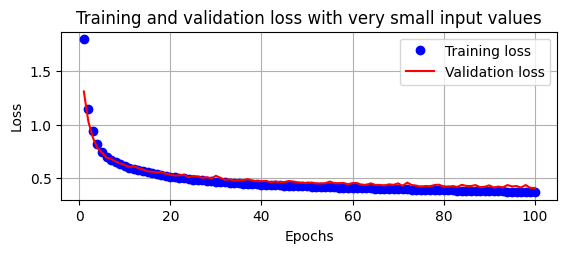

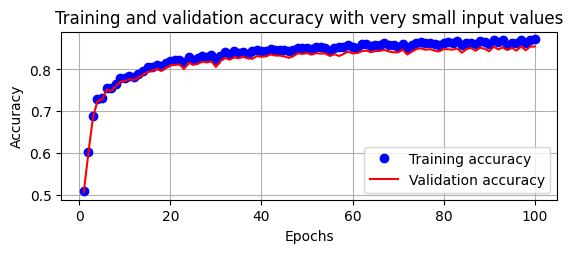

In [56]:
epochs = np.arange(100)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and validation loss with very small input values')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with very small input values')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

    The model trained in the scenario struggled to achieve a satisfactory level of accuracy, reaching approximately 85% validation accuracy after 100 epochs, whereas in prior sections, a similar model achieved around 90% accuracy within just 10 epochs.



Let's understand the reason why the model doesn't train as well when the input values have a very small range by exploring the hidden values' distribution, as well as the parameter distribution:

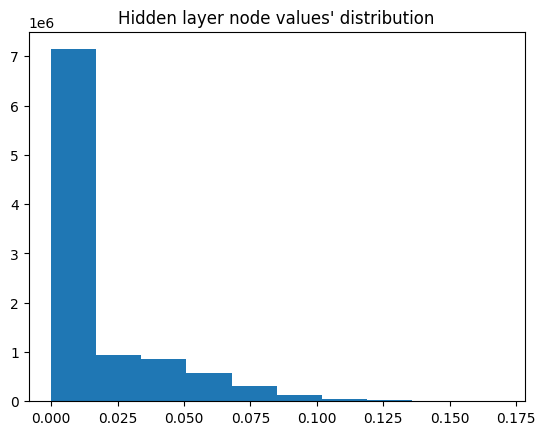

In [57]:
plt.hist(model(x)[1].cpu().detach().numpy().flatten())
plt.title("Hidden layer node values' distribution")
plt.show()

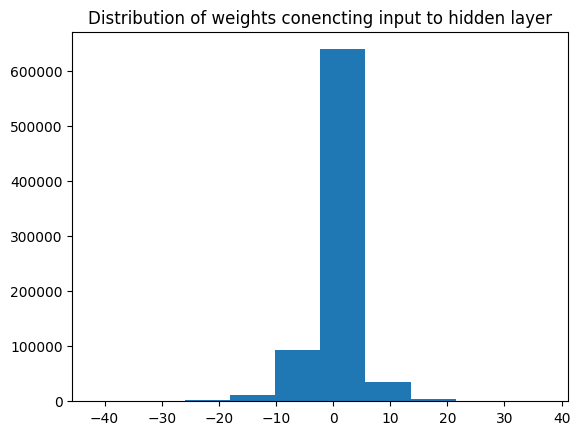

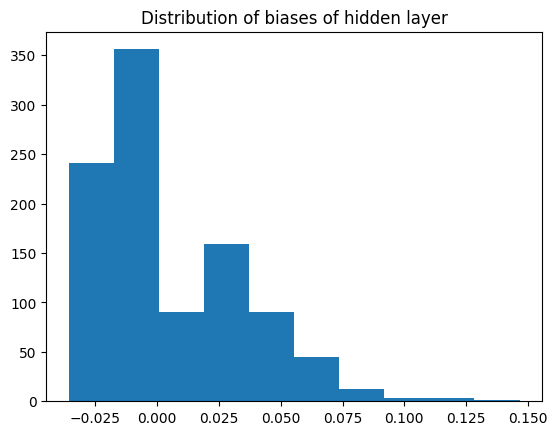

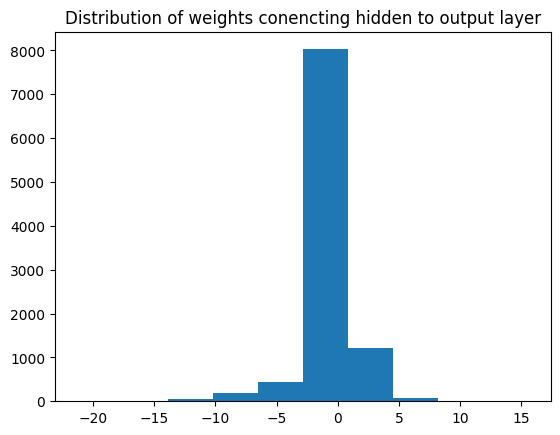

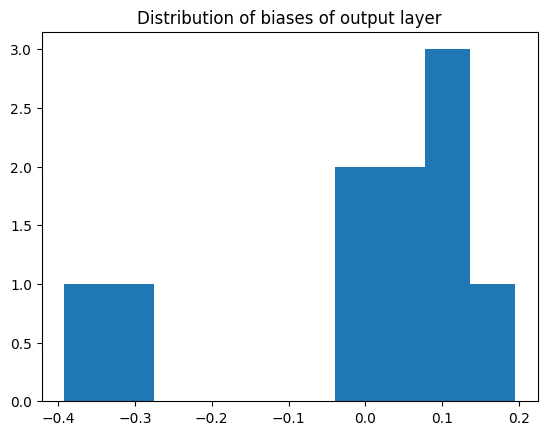

In [58]:
for ix, par in enumerate(model.parameters()):
  if(ix==0):
      plt.hist(par.cpu().detach().numpy().flatten())
      #plt.xlim(-2,2)
      plt.title('Distribution of weights conencting input to hidden layer')
      plt.show()
  elif(ix ==1):
      plt.hist(par.cpu().detach().numpy().flatten())
      #plt.xlim(-2,2)
      plt.title('Distribution of biases of hidden layer')
      plt.show()
  elif(ix==2):
      plt.hist(par.cpu().detach().numpy().flatten())
      #plt.xlim(-2,2)
      plt.title('Distribution of weights conencting hidden to output layer')
      plt.show()
  elif(ix ==3):
      plt.hist(par.cpu().detach().numpy().flatten())
      #plt.xlim(-2,2)
      plt.title('Distribution of biases of output layer')
      plt.show()  

`Note` that the first distribution indicates the distribution of values in the hidden layer (where we can see that the values have a very small range). Furthermore, given that both the input and hidden layer values have a very small range, the weights had to be varied by a large amount (for both the weights that are connecting the input to the hidden layer and the weights that are connecting the hidden layer to the output layer).


---
# Very small input values with batch normalization

In [3]:
# we'll be adding batch normalization while defining the model architecture.
def get_model():
    class neuralnet(nn.Module):
        def __init__(self):
            super().__init__()
            self.input_to_hidden_layer = nn.Linear(28*28,1000)
            self.batch_norm =nn.BatchNorm1d(1000)
            self.hidden_layer_activation = nn.ReLU()
            self.hidden_to_output_layer =nn.Linear(1000,10)
        def forward(self,x):
            x  = self.input_to_hidden_layer(x)
            x0 = self.batch_norm(x)
            x1 = self.hidden_layer_activation(x0)
            x2 = self.hidden_to_output_layer(x1)
            return x2 ,x1
        
    model = neuralnet().to(device=device)
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(),lr=1e-3)
    return model, loss_fn, optimizer  

def train_batch(x,y,model,loss_fn,opt):
    prediction =model(x)[0]   #  0th index contains the output layer's values
    batch_loss = loss_fn(prediction,y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()
def train_batch(x, y, model, optimizer, loss_fn):
    prediction = model(x)[0]
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

def get_data():     
    train = FMNISTDataset(tr_images, tr_targets)     
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)     
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=True)
    return trn_dl, val_dl

@torch.inference_mode()
def accuracy(x,y,model):
    model.eval()
    prediction = model(x)[0]
    max_value , argmaxes = prediction.max(-1)
    is_correct = argmaxes == y 
    return is_correct.cpu().numpy().tolist()

@torch.inference_mode()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)[0]
    val_loss = loss_fn(prediction, y)
    return val_loss.item()


`Note` that in the preceding code, we declared a variable (batch_norm) that performs batch normalization (nn.BatchNorm1d). The reason we are performing nn.BatchNorm1d(1000) is because the output dimension is 1,000 for each image (that is, a 1-dimensional output for the hidden layer).

In [4]:
val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

model, loss_fn, optimizer = get_model()
trn_dl, val_dl = get_data()

train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(100):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)        
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)

    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


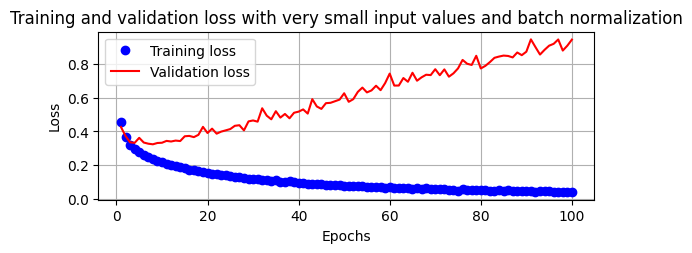

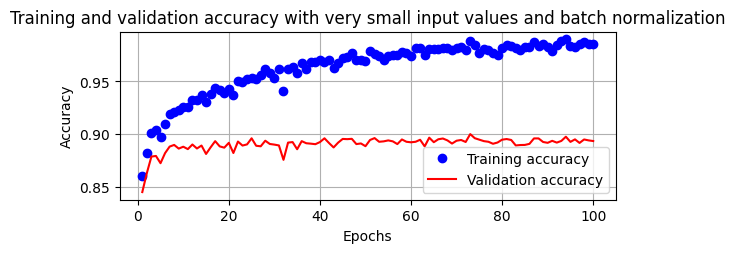

In [5]:
epochs = np.arange(100)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and validation loss with very small input values and batch normalization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with very small input values and batch normalization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

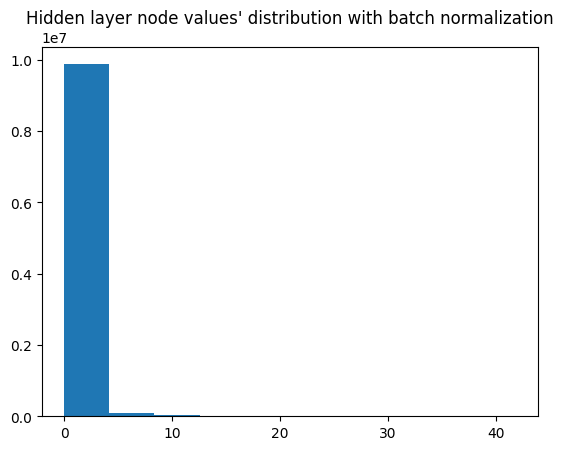

In [6]:
plt.hist(model(x)[1].cpu().detach().numpy().flatten())
plt.title("Hidden layer node values' distribution with batch normalization")
plt.show()

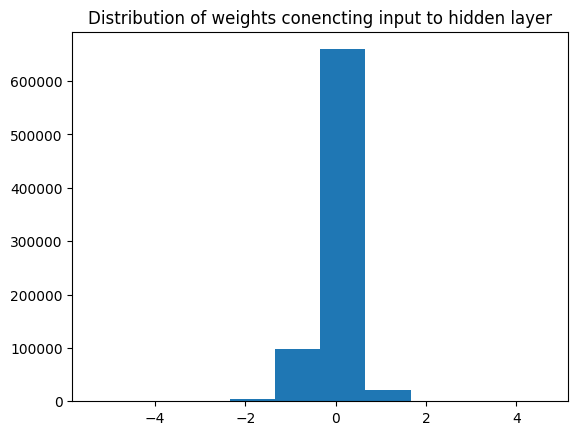

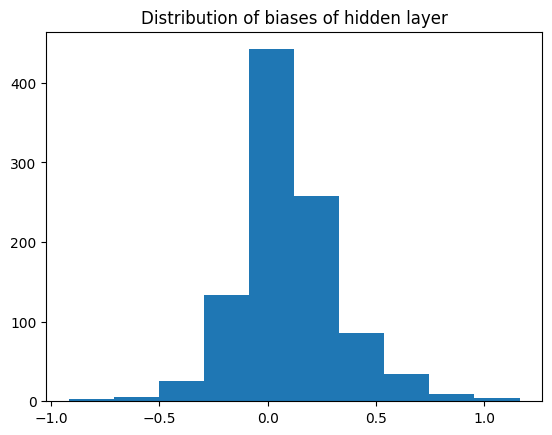

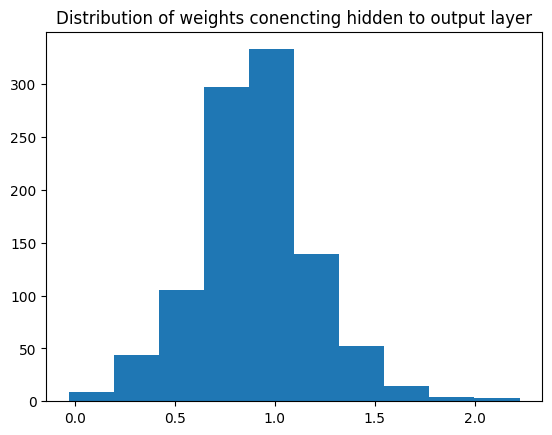

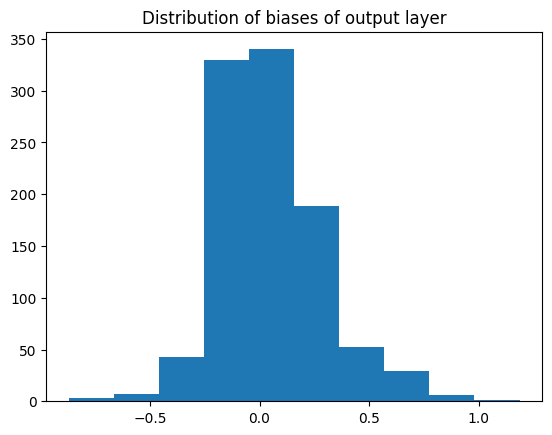

In [7]:
for ix, par in enumerate(model.parameters()):
  if(ix==0):
      plt.hist(par.cpu().detach().numpy().flatten())
      #plt.xlim(-2,2)
      plt.title('Distribution of weights conencting input to hidden layer')
      plt.show()
  elif(ix ==1):
      plt.hist(par.cpu().detach().numpy().flatten())
      #plt.xlim(-2,2)
      plt.title('Distribution of biases of hidden layer')
      plt.show()
  elif(ix==2):
      plt.hist(par.cpu().detach().numpy().flatten())
      #plt.xlim(-2,2)
      plt.title('Distribution of weights conencting hidden to output layer')
      plt.show()
  elif(ix ==3):
      plt.hist(par.cpu().detach().numpy().flatten())
      #plt.xlim(-2,2)
      plt.title('Distribution of biases of output layer')
      plt.show()  

Here, we can see that the hidden layer values have a larger distribution when we have batch normalization and that the weights connecting the hidden layer to the output layer have a smaller distribution. The results in the model learning as effectively as it could in the previous sections.

`Tip` Batch normalization helps considerably when training deep neural networks. It helps us avoid gradients becoming so small that the weights are barely updated.



    Note that in the preceding scenario, we attained high validation accuracy sooner than when there was no batch normalization at all. This could have been the result of normalizing the intermediate layers, resulting in fewer chances of saturation occurring in the weights.

---

# The concept of overfitting

**Having high accuracy on the training dataset and considerably lower accuracy on the validation dataset refers to the scenario of overfitting.**

* ###### Overfitting occurs when a neural network learns the training data too well and is unable to generalize to new data.

* ###### One way that overfitting can occur is through weight update. If the weights are updated too aggressively, the network may start to learn the specific patterns in the training data rather than the underlying concepts.

* ###### This can lead to the network making accurate predictions for the training data, but poor predictions for new data.

##### Some of the typical strategies that are employed to reduce the effect of overfitting are as follows:


* Dropout
* Regularization

# Impact of adding dropout

Dropout is a mechanism that randomly chooses a specified percentage of activations and drops them to 0. In the next iteration, another random set of hidden units are switched off. This way, the neural network does not optimize for edge cases as the network does not get that many opportunities to adjust the weight to memorize for edge cases (given that the weight is not updated in each iteration).

`Note` that, during prediction, dropout doesn't need to be applied since this mechanism can only be applied to a trained model. Furthermore, the weights will be downscaled automatically during prediction (evaluation) to adjust for the magnitude of the weights (since all the weights are present during prediction time).

###### Usually, there are cases where the layers behave differently during training and validation – as you saw in the case of dropout. For this reason, you must specify the mode for the model upfront using one of two methods – `model.train()` to let the model know it is in training mode and `model.eval()` to let it know that it is in evaluation mode. If we don't do this, we might get unexpected results. 

In [1]:
from torchvision import datasets
import torch
data_folder = 'Dataset/FMNIST/' # This can be any directory you want to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets
val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1,28*28)
        self.x, self.y = x, y 
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]        
        return x.to(device), y.to(device)
    def __len__(self): 
        return len(self.x)

from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Dropout(0.25),
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Dropout(0.25),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

def train_batch(x, y, model, opt, loss_fn):
    model.train()
    prediction = model(x)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

def accuracy(x, y, model):
    with torch.inference_mode():
        prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

def get_data():     
    train = FMNISTDataset(tr_images, tr_targets)     
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)     
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=True)
    return trn_dl, val_dl

@torch.inference_mode()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

###### `Note` that in the preceding code, Dropout is specified before linear activation is. This specifies that a fixed percentage of the weights in the linear activation layer won't be updated.

In [3]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(30):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)        
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
    val_epoch_accuracy = np.mean(val_is_correct)

    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


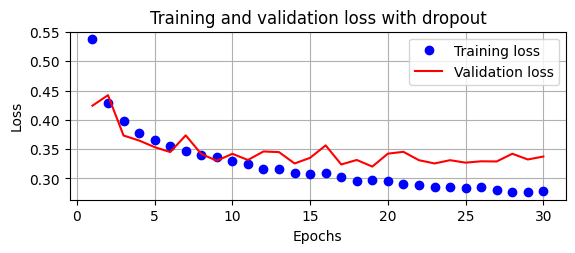

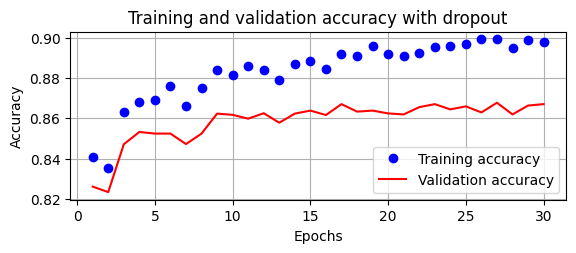

In [5]:
epochs = np.arange(30)+1
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and validation loss with dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

###### `Note` that in the preceding scenario, the delta between the training and validation datasets' accuracy is not as large as we saw in the previous scenario, thus resulting in a scenario that has less overfitting.

---

# Impact of regularization

`Regularization` is a technique in which we penalize the model for having high weight values. Hence, it is a dual objective function – minimize the loss of training data, as well as the weight values.

#### Two types of regularization:
* L1 regularization

* L2 regularization

    L1 regularization is calculated as follows:
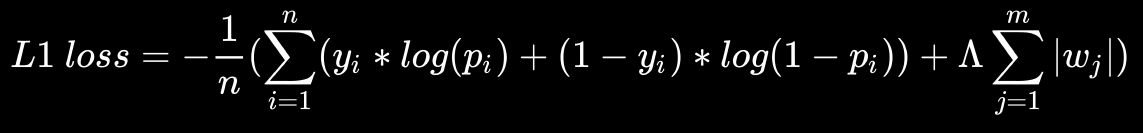

The first part of the preceding formula refers to the categorical cross-entropy loss that we have been using for optimization so far, while the second part refers to the absolute sum of the weight values of the model.

`Note` that L1 regularization ensures that it penalizes for the high absolute values of weights by incorporating them in the loss value calculation.

In [10]:
# L1 regularization is implemented while training the model, as follows:
def train_batch(x, y, model ,opt , loss_fn):
    model.train()
    prediction = model(x)
    l1_regularization = 0
    for param in model.parameters():
        l1_regularization += torch.linalg.norm(param,1)
    batch_loss = loss_fn(prediction,y)+0.0001*l1_regularization
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()

# In the preceding code, we have enforced regularization on the weights and biases across all the layers by initializing l1_regularization.

# torch.norm(param,1) provides the absolute value of the weight and bias values across layers.

# Furthermore, we have a very small weightage (0.0001) associated with the sum of the absolute value of the parameters across layers.

In [17]:
from torchvision import datasets
import torch
data_folder = 'Dataset/FMNIST/' # This can be any directory you want to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets
val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)
val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
device = 'cuda' if torch.cuda.is_available() else 'cpu'

class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1,28*28)
        self.x, self.y = x, y 
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]        
        return x.to(device), y.to(device)
    def __len__(self): 
        return len(self.x)

from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

def train_batch(x, y, model, opt, loss_fn):
    prediction = model(x)
    l1_regularization = 0
    for param in model.parameters():
      l1_regularization += torch.norm(param,1)
    batch_loss = loss_fn(prediction, y) + 0.0001*l1_regularization
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

def accuracy(x, y, model):
    with torch.inference_mode():
        prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()


@torch.inference_mode()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

trn_dl, val_dl = get_data()
model_l1, loss_fn, optimizer = get_model()

In [19]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(30):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model_l1, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)        
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model_l1)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model_l1)
        validation_loss = val_loss(x, y, model_l1)
    val_epoch_accuracy = np.mean(val_is_correct)

    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


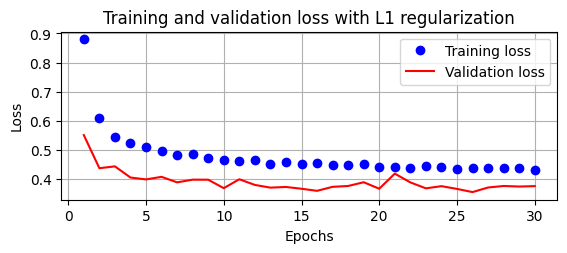

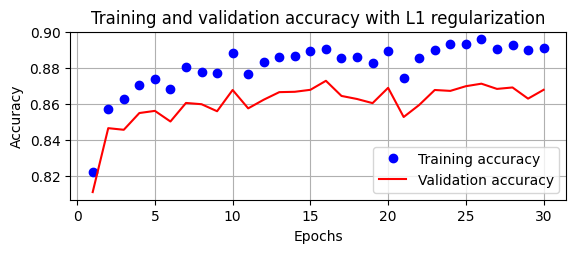

In [21]:
epochs = np.arange(30)+1
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and validation loss with L1 regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with L1 regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

we can see that the difference between the training and validation datasets' accuracy is not as high as it was without L1 regularization.

    L2 regularization is calculated as follows:

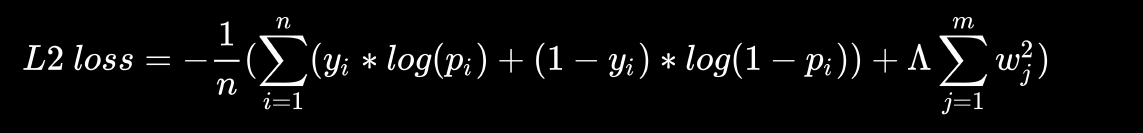

The first part of the preceding formula refers to the categorical cross-entropy loss obtained, while the second part refers to the squared sum of the weight values of the model.

Similar to L1 regularization, we are penalizing for high weight values by having the sum of squared values of weights incorporated in the loss value calculation.

In [31]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1,28*28)
        self.x, self.y = x, y 
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]        
        return x.to(device), y.to(device)
    def __len__(self): 
        return len(self.x)

from torch.optim import SGD, Adam
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

def train_batch(x, y, model, opt, loss_fn):
    prediction = model(x)
    l2_regularization = 0
    for param in model.parameters():
      l2_regularization += torch.norm(param,2)
    batch_loss = loss_fn(prediction, y) + 0.01*l2_regularization
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

def accuracy(x, y, model):
    with torch.no_grad():
        prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()


`Note` that in the preceding code, the regularization parameter, (0.01), is slightly higher than in L1 regularization since the weights are generally between -1 to 1 and a square of them would result in even smaller values. Multiplying them by an even smaller number, as we did in L1 regularization, would result in us having very little weightage for regularization in the overall loss calculation.

In [32]:
trn_dl, val_dl = get_data()
model_l2, loss_fn, optimizer = get_model()

In [33]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(30):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model_l2, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss)        
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model_l2)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)

    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model_l2)
        validation_loss = val_loss(x, y, model_l2)
    val_epoch_accuracy = np.mean(val_is_correct)

    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


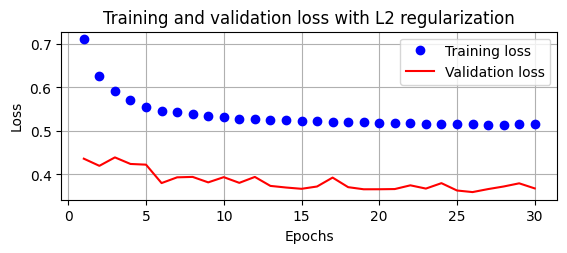

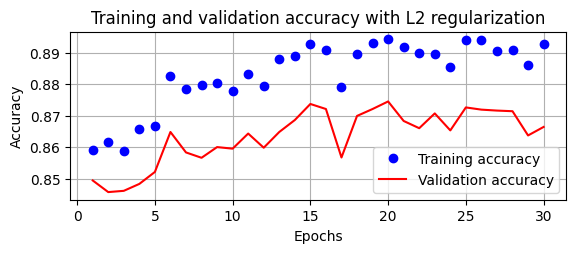

In [34]:
epochs = np.arange(30)+1
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.title('Training and validation loss with L2 regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy with L2 regularization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid('off')
plt.show()

we can see that L2 regularization has also resulted in the validation and training datasets' accuracy and loss values being close to each other.

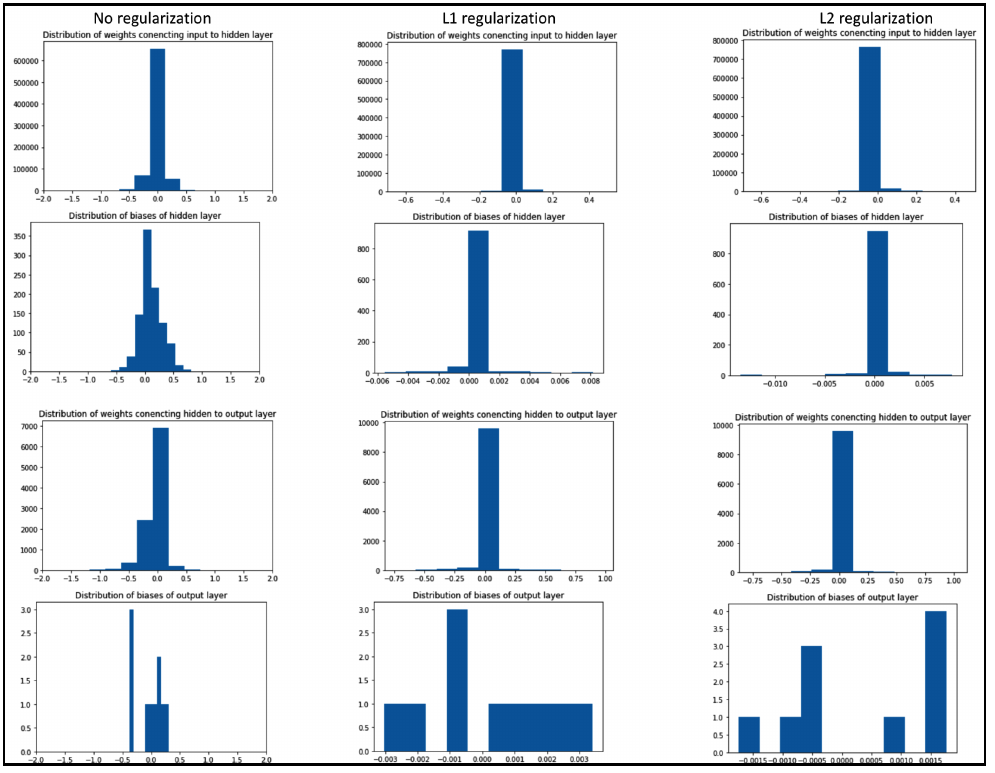

we can see that the distribution of parameters is very small when we perform L1/ L2 regularization compared to performing no regularization. This potentially reduces the chances that weights get updated for edge cases.